# Project 1: ECE 232E

In [1]:
library("igraph")
library("ggplot2")
library('Matrix')
library('pracma') 


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘pracma’ was built under R version 3.6.3”
Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



# Part 1: Generating Random Networks

## Problem 1: ER Networks

[1] "p:"               "0.003"            "2.978"            "2.64015615615616"
[1] "p:"              "0.004"           "3.916"           "3.9589029029029"


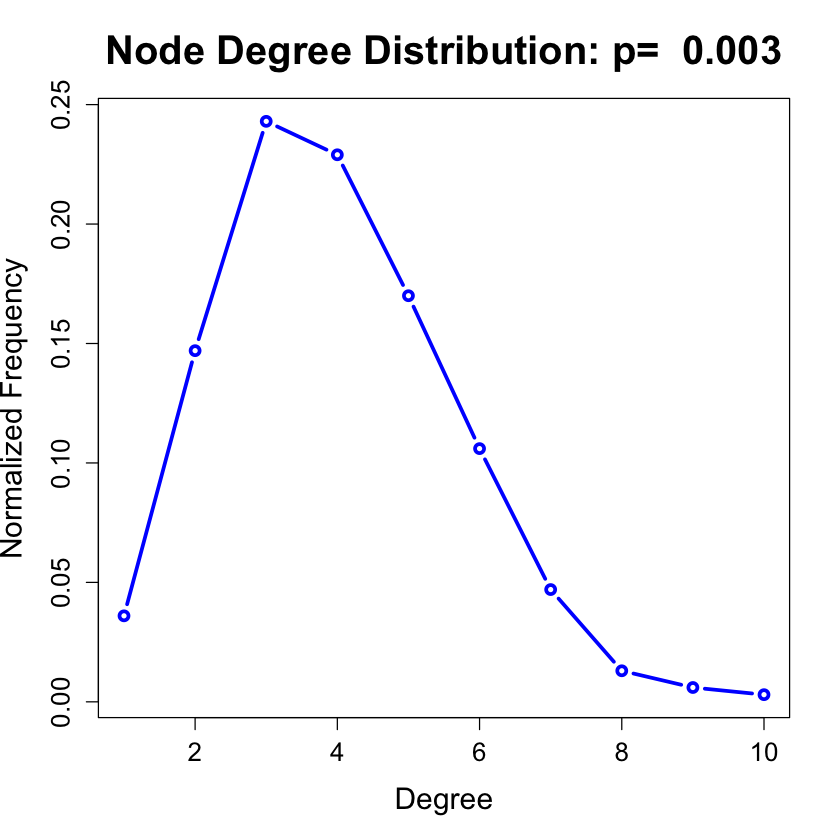

[1] "p:"               "0.01"             "10.01"            "10.4843843843844"


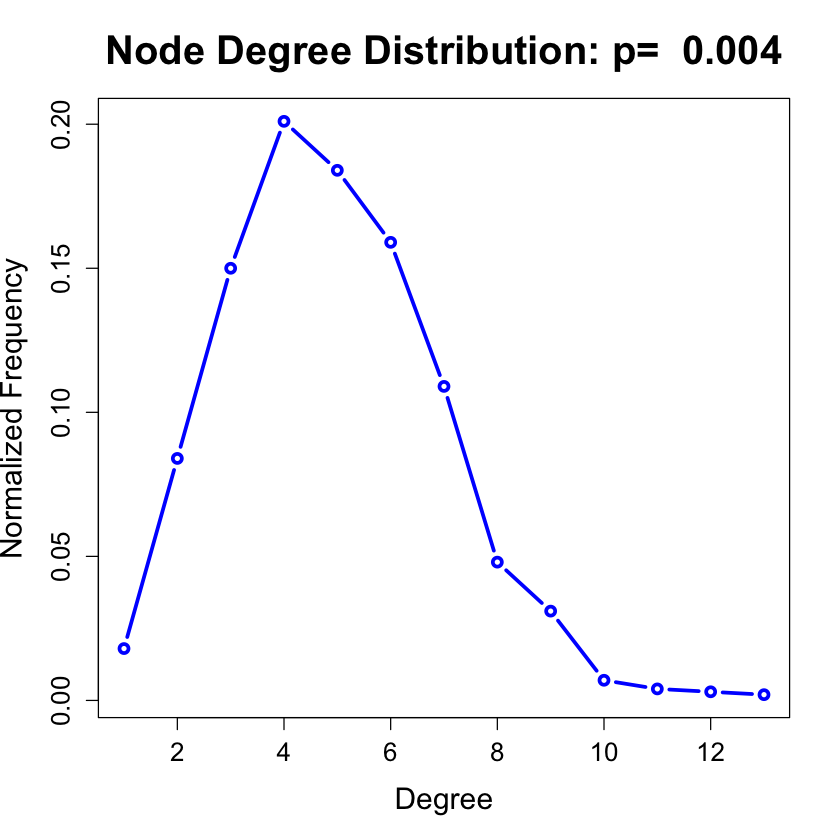

[1] "p:"               "0.05"             "49.996"           "50.8628468468468"


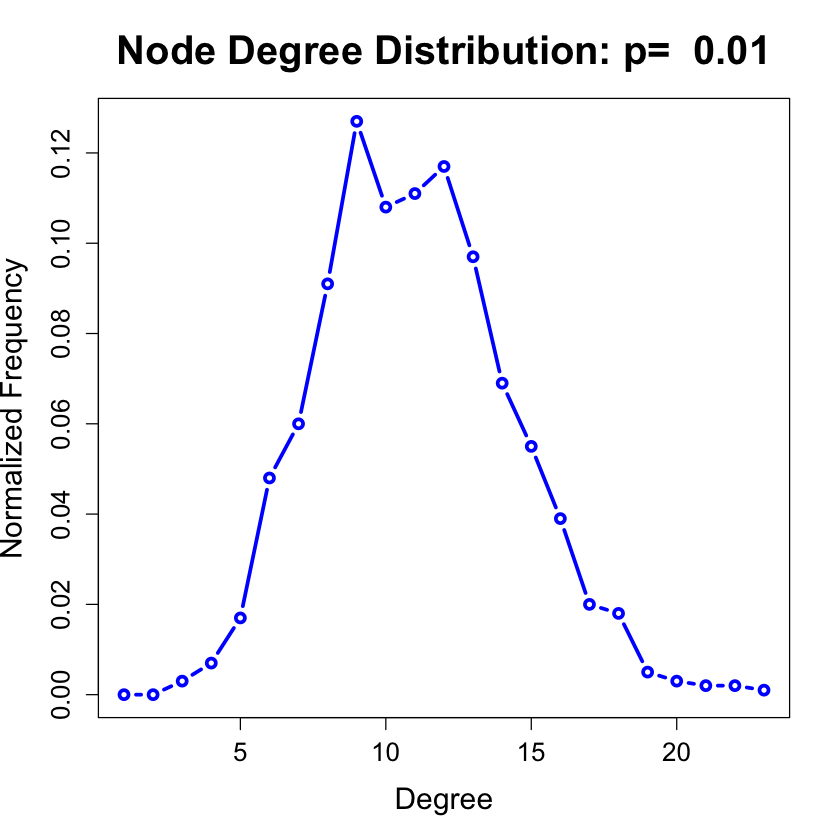

[1] "p:"               "0.1"              "99.246"           "91.9534374374374"


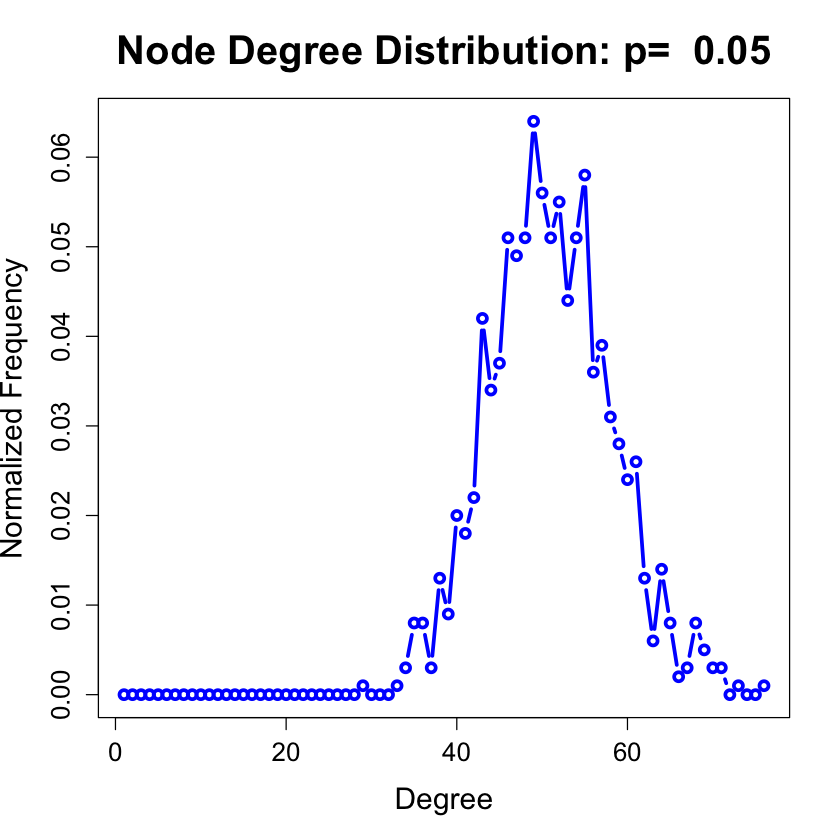

[1]  2.997  3.996  9.990 49.950 99.900

[1]  2.988009  3.980016  9.890100 47.452500 89.910000

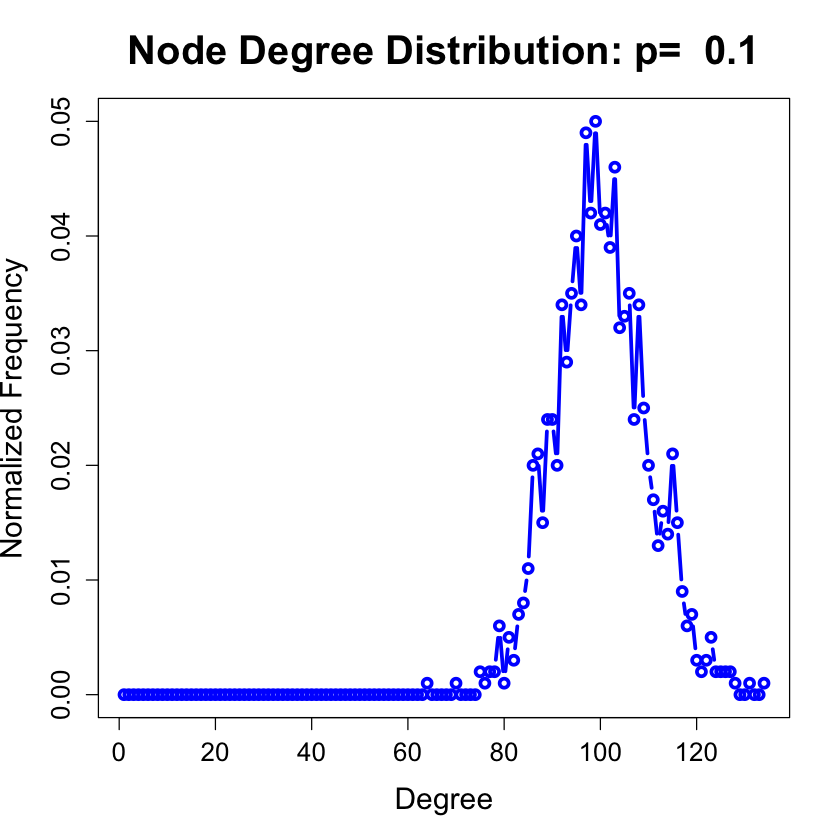

In [2]:
# Problem 1(a)
n = 1000
for(p in c(0.003, 0.004, 0.01, 0.05, 0.1)){
    g = sample_gnp(n, p)
    deg = degree(g)
    hist = degree_distribution(g)
    print(c('p:', p, mean(deg), var(deg)))
    plot(hist, type="b", main=paste("Node Degree Distribution: p= ", p), lwd = 3,
    xlab="Degree", ylab="Normalized Frequency",col="blue",cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
}

# Theoretical Mean
probs = c(0.003, 0.004, 0.01, 0.05, 0.1);
probs * 999

# Theoretical Var
probs * 999 * (1-probs)

[1] "For p =  0.003  Connected =  0  Mode GCC:  14"
[1] "----------------------------"
[1] "For p =  0.004  Connected =  0  Mode GCC:  11"
[1] "----------------------------"
[1] "For p =  0.01  Connected =  95  Mode GCC:  5"
[1] "----------------------------"
[1] "For p =  0.05  Connected =  100  Mode GCC:  NA"
[1] "----------------------------"
[1] "For p =  0.1  Connected =  100  Mode GCC:  NA"
[1] "----------------------------"


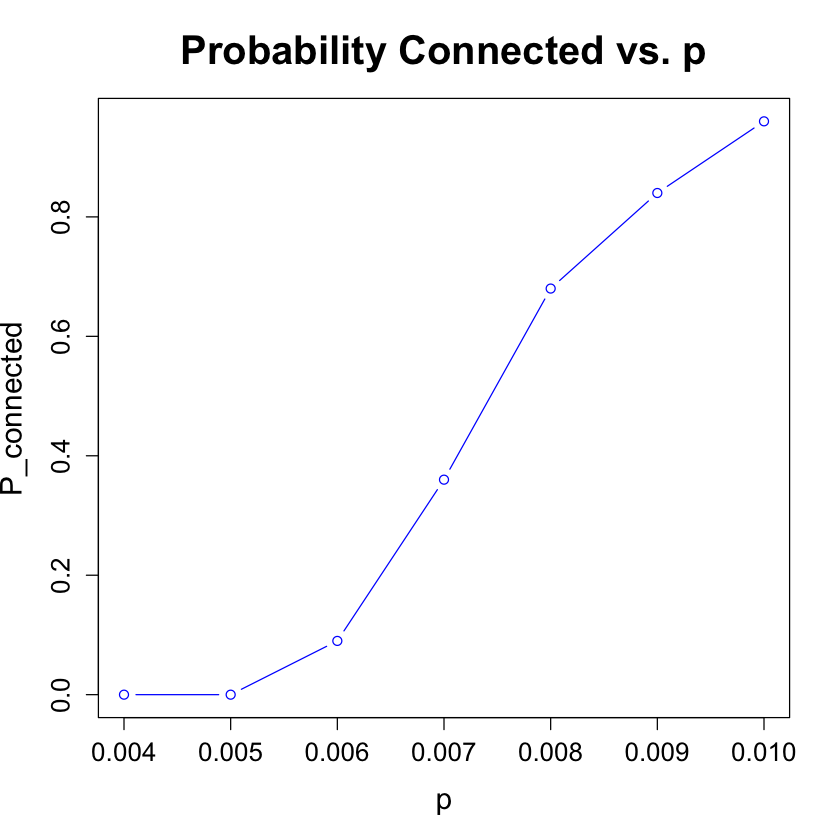

In [117]:
# Problem 1(b)
n = 1000
GCC_mode <- character(5)

for(p in c(0.003, 0.004, 0.01, 0.05, 0.1)){ 
    cnt_connected = 0
    GCC_vector = character(100)
    i=0
    for (val in 1:100){  
        g = sample_gnp(n,p)
        if(!is_connected(g)){ # to check if the graph is not connected
            i = i+1
            # Find diameter of largest component
            components = clusters(g)
            biggest_cluster_id = which.max(components$csize) 
            vert_ids = V(g)[components$membership == biggest_cluster_id]
            GCC_vector[i] = diameter(induced_subgraph(g, vert_ids))
            
        } else { 
            cnt_connected = cnt_connected + 1
        }
    }
    unique_GCCs = unique(GCC_vector)
    unique_GCCs = unique_GCCs[unique_GCCs != ""]
    GGC_mode = unique_GCCs[which.max(tabulate(match(GCC_vector, unique_GCCs)))]
    print(paste("For p = ", p," Connected = ",cnt_connected," Mode GCC: ",GGC_mode))
    print("----------------------------")
}

# Prob connected vs p
x = c()
y = c()
for(p in (4:10)*0.001){
    cnt_connected = 0
    for (val in 1:100){  
        g = sample_gnp(n,p)
        if(is_connected(g)){ # to check if the graph is not connected
            cnt_connected = cnt_connected + 1
        }
    }
    x = c(x,p)
    y = c(y,cnt_connected/100)
}

# Plot Prob connected vs p
plot(x, y, type = 'b', main="Probability Connected vs. p", xlab="p", ylab="P_connected",
         cex.main = 2, cex.lab =1.5, cex.axis = 1.3,col = "blue")

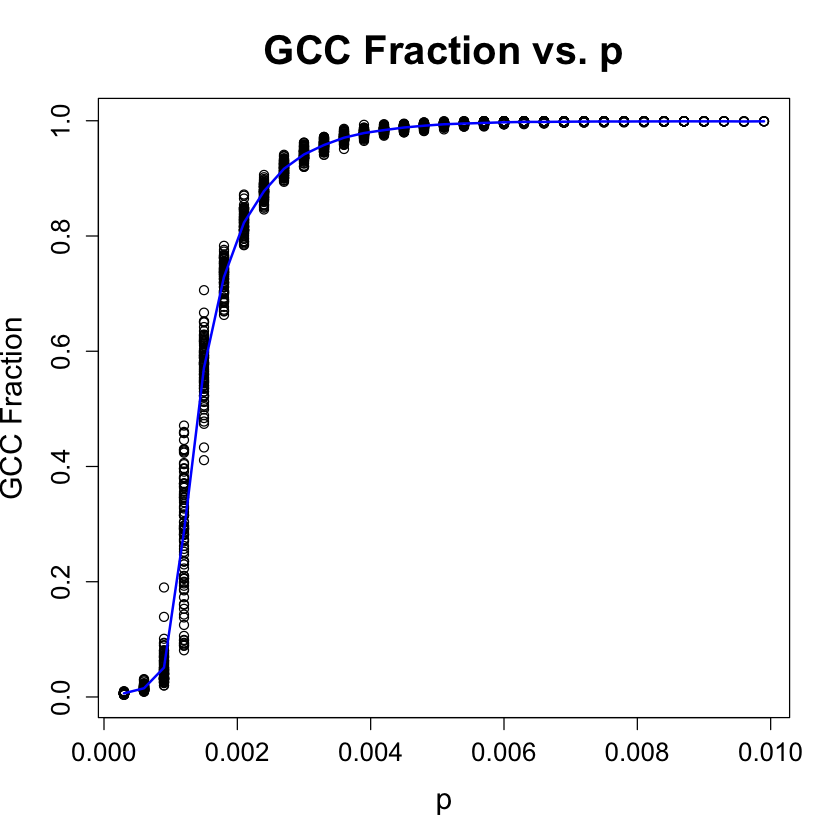

[1] "Transition Point 1 (Emergence):  0.001"
[1] "Transition Point 2 (Dominance):  0.00690775527898214"


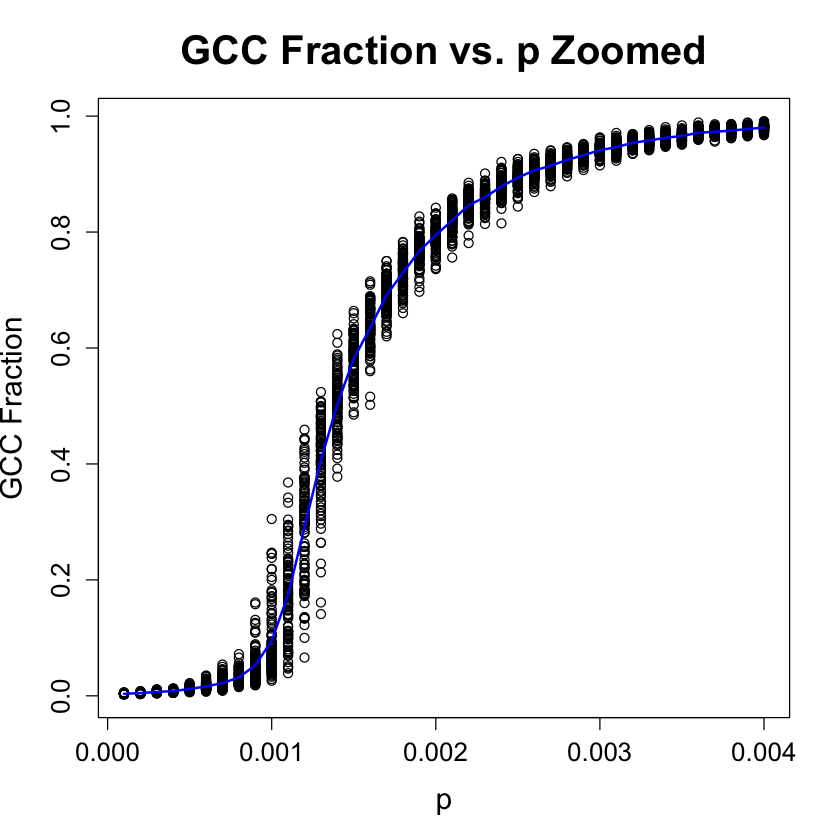

In [122]:
# Problem 1(c)
n = 1000
x = c()
y = c()
x_avg = c()
y_avg = c()

for(p in (1:33)*0.0003){
    # print(p)
    y_p = c()
    for(i in 1:100){
        g = sample_gnp(n, p)
        if(!is_connected(g)){ # to check if the graph is not connected
            
            # Find size of largest CC
            components = clusters(g)
            size = max(components$csize)
            
            # Update vectors with largest CC
            x = c(x, p)
            y = c(y, size/1000)
            y_p = c(y_p, size/1000)
        }
    }
    
    

    if(length(y_p)!=0){
        x_avg = c(x_avg, p)
        y_avg = c(y_avg, mean(y_p))
    }
    
}

# Plot Results
plot(x, y, main="GCC Fraction vs. p", xlab="p", ylab="GCC Fraction",
         cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
lines(x_avg, y_avg,col="blue",lwd=2)

# Zoom in on region .0001 .004
x = c()
y = c()
x_avg = c()
y_avg = c()

for(p in (1:40)*0.0001){
    # print(p)
    y_p = c()
    for(i in 1:100){
        g = sample_gnp(n, p)
        if(!is_connected(g)){ # to check if the graph is not connected
            
            # Find size of largest CC
            components = clusters(g)
            size = max(components$csize)
            
            # Update vectors with largest CC
            x = c(x, p)
            y = c(y, size/1000)
            y_p = c(y_p, size/1000)
        }
    }
    
    

    if(length(y_p)!=0){
        x_avg = c(x_avg, p)
        y_avg = c(y_avg, mean(y_p))
    }
    
}

# Plot Results
plot(x, y, main="GCC Fraction vs. p Zoomed", xlab="p", ylab="GCC Fraction",
         cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
lines(x_avg, y_avg,col="blue",lwd=2)

#Theoretical Emergence and 99% GCC
print(paste("Transition Point 1 (Emergence): ", 1/n))
print(paste("Transition Point 2 (Dominance): ", log(n)/n))

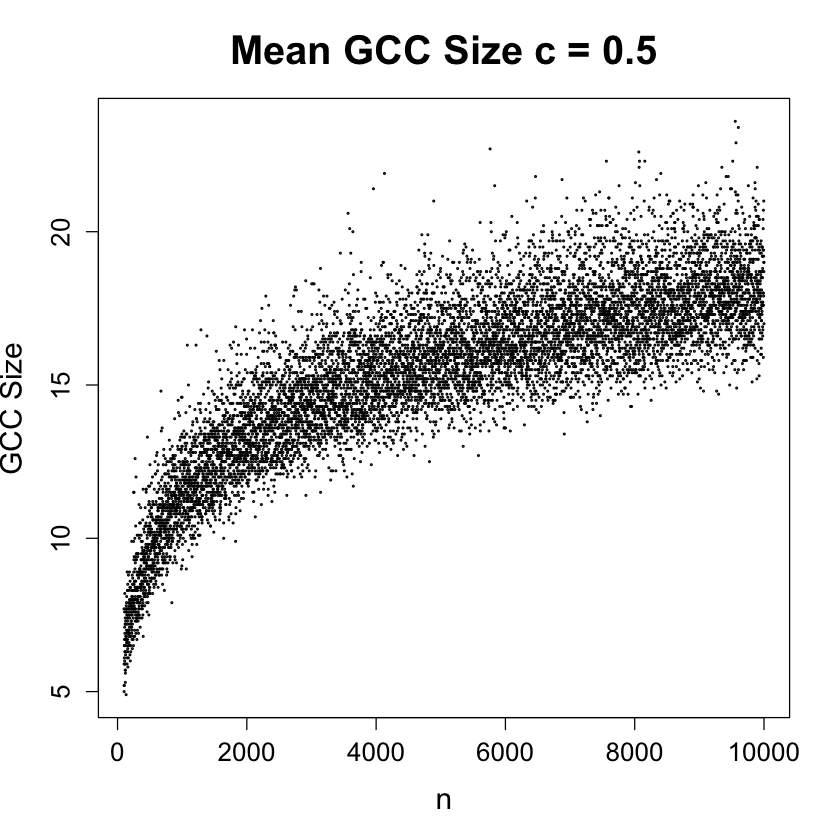


Call:
lm(formula = ylog ~ xlog)

Coefficients:
(Intercept)         xlog  
     0.9438       0.2141  


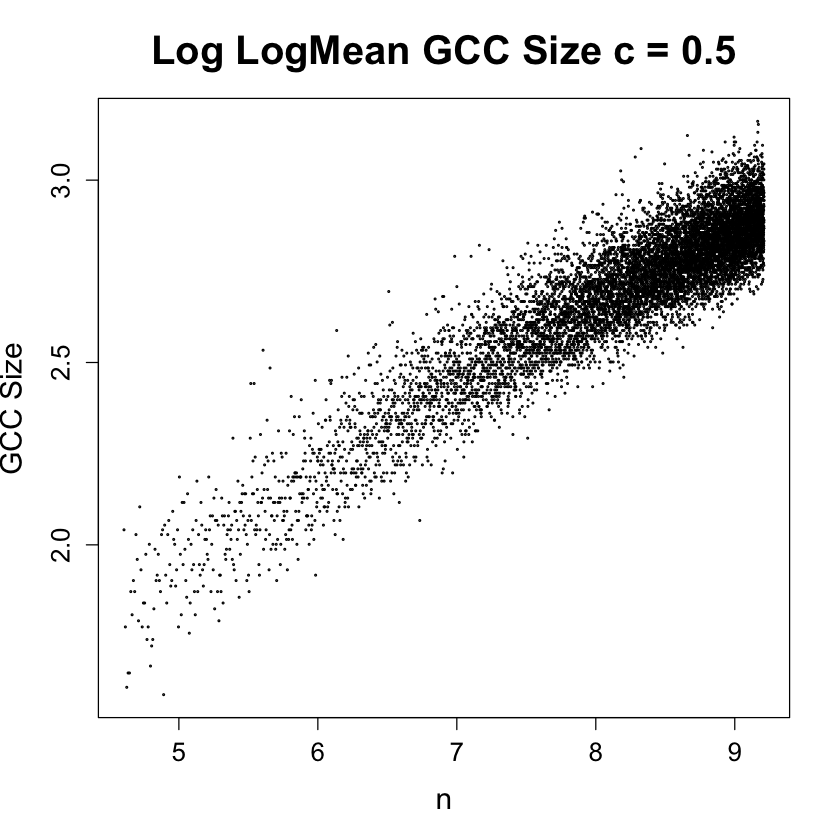

In [3]:
# Problem 1(d)(i)
constant = 0.5
x = c()
y = c()
x_avg = c()
y_avg = c()

for(n in 100:10000){
    
    p = constant/n
    x = c(x, n)
    y_p = c()
    for(i in 1:10){
        g = sample_gnp(n, p)

        if(!is_connected(g)){ # to check if the graph is not connected

            # Find size of largest CC
            components = clusters(g)
            size = max(components$csize)

            # Update vector with largest CC
            
            y_p = c(y_p, size)
        
        }
    }
    
    y_avg = c(y_avg, mean(y_p))
}

plot(x, y_avg, main="Mean GCC Size c = 0.5", xlab="n", ylab="GCC Size",
         cex=.2, cex.main = 2, cex.lab =1.5, cex.axis = 1.3)


xlog = log(x)
ylog = log(y_avg)
plot(xlog, ylog, main="Log LogMean GCC Size c = 0.5", xlab="n", ylab="GCC Size",
         cex=.2, cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
lm(ylog~xlog)

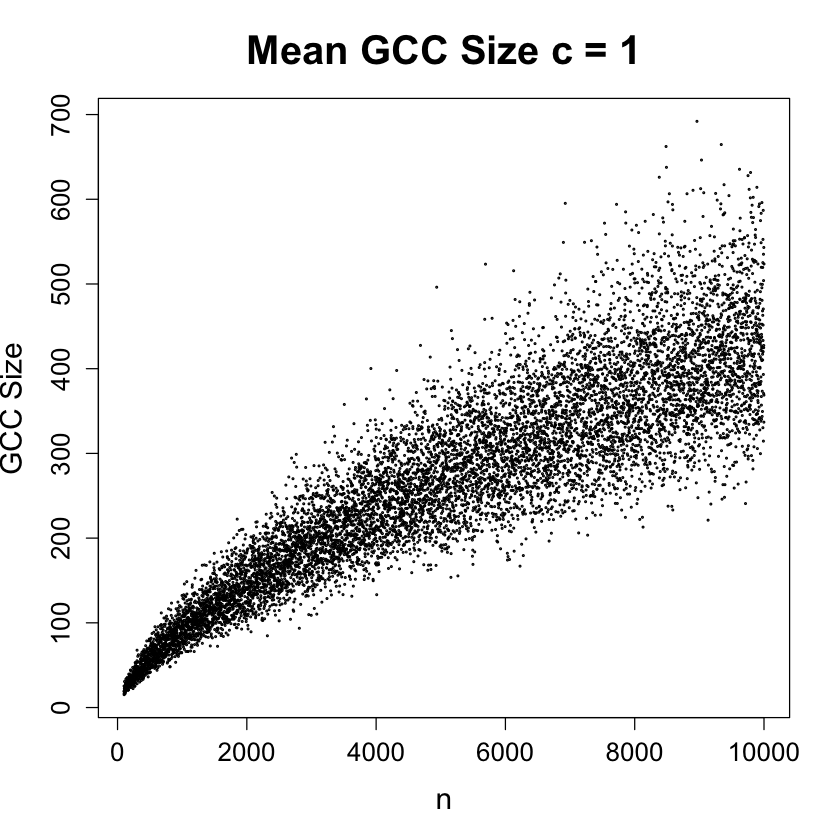


Call:
lm(formula = ylog ~ xlog)

Coefficients:
(Intercept)         xlog  
    -0.1153       0.6704  


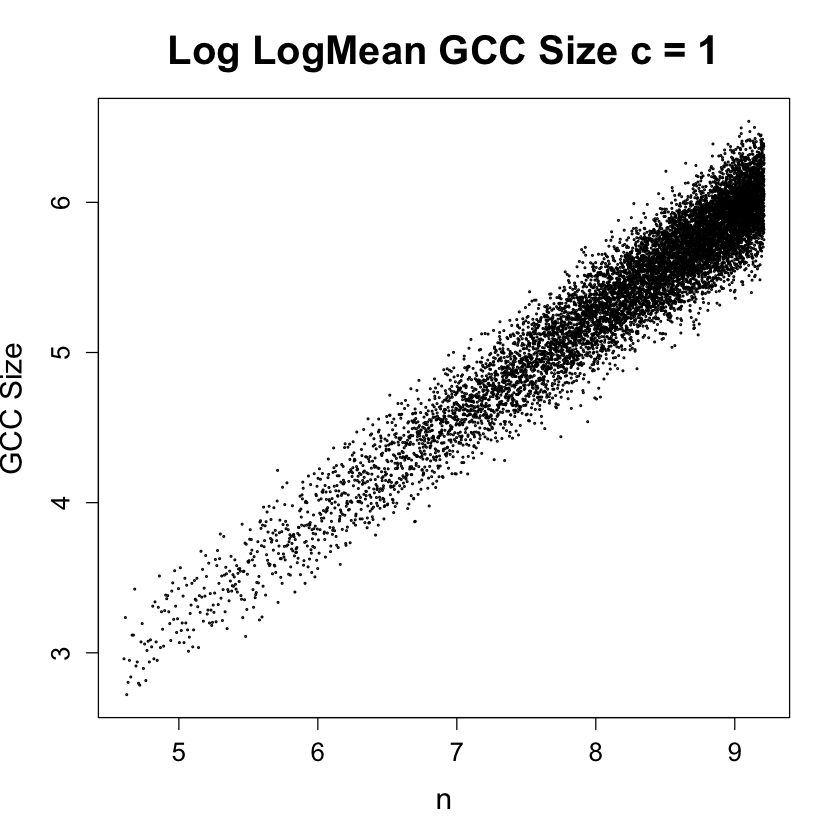

In [5]:
# Problem 1(d)(ii)
constant = 1
x = c()
y = c()
x_avg = c()
y_avg = c()

for(n in 100:10000){
    p = constant/n
    x = c(x, n)
    y_p = c()
    for(i in 1:10){
        g = sample_gnp(n, p)

        if(!is_connected(g)){ # to check if the graph is not connected

            # Find size of largest CC
            components = clusters(g)
            size = max(components$csize)

            # Update vector with largest CC
            
            y_p = c(y_p, size)
        
        }
    }
    
    y_avg = c(y_avg, mean(y_p))
}

plot(x, y_avg, main="Mean GCC Size c = 1", xlab="n", ylab="GCC Size",
         cex=.2, cex.main = 2, cex.lab =1.5, cex.axis = 1.3)

xlog = log(x)
ylog = log(y_avg)
plot(xlog, ylog, main="Log LogMean GCC Size c = 1", xlab="n", ylab="GCC Size",
         cex=.2, cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
lm(ylog~xlog)

In [36]:
# Problem 1(d)(iii)
constant = 1.2
x = c()
y = c()
y_avg_2 = c()
for(n in (10:1000)*10){
    p = constant/n
    x = c(x, n)
    y_p = c()
    for(i in 1:10){
        g = sample_gnp(n, p)

        if(!is_connected(g)){ # to check if the graph is not connected

            # Find size of largest CC
            components = clusters(g)
            size = max(components$csize)

            # Update vector with largest CC

            y_p = c(y_p, size)

        }
    }

    y_avg_2 = c(y_avg_2, mean(y_p))
}

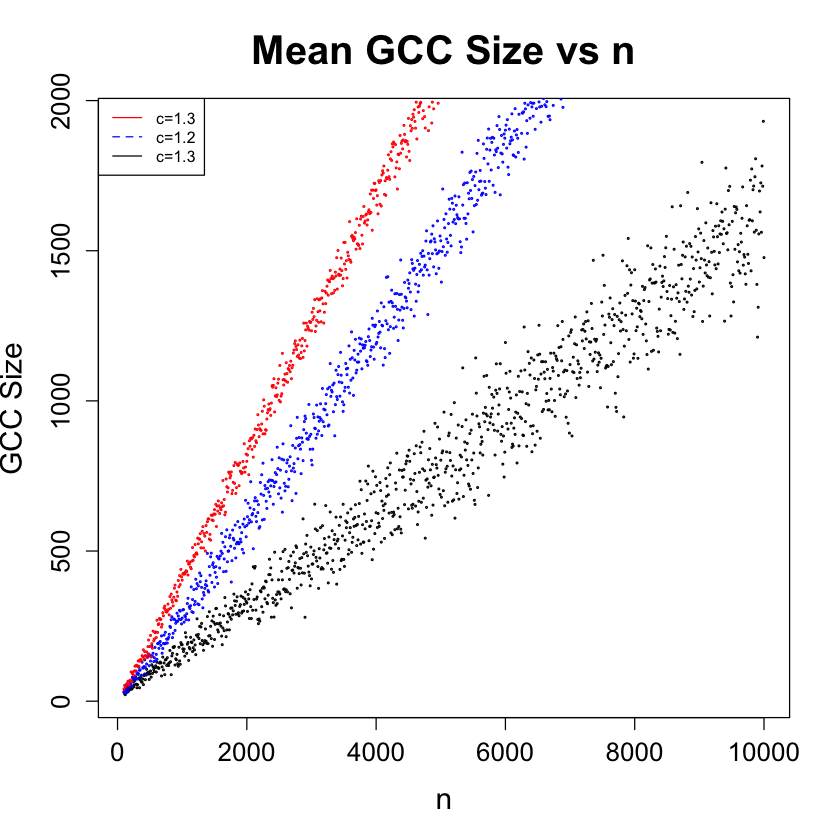

In [43]:
# Problem 1(d)(iii): Plot
plot(x, y_avg_1, main="Mean GCC Size vs n", xlab="n", ylab="GCC Size",
         cex=.2, cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
points(x, y_avg_2, cex=.2,col="blue")
points(x, y_avg_3, cex=.2,col="red")
legend("topleft", legend=c("c=1.3", "c=1.2",  "c=1.3"),
       col=c("red", "blue","black"), lty=1:2, cex=0.8)


## Problem 2: Preferential Attachment Networks

[1] TRUE

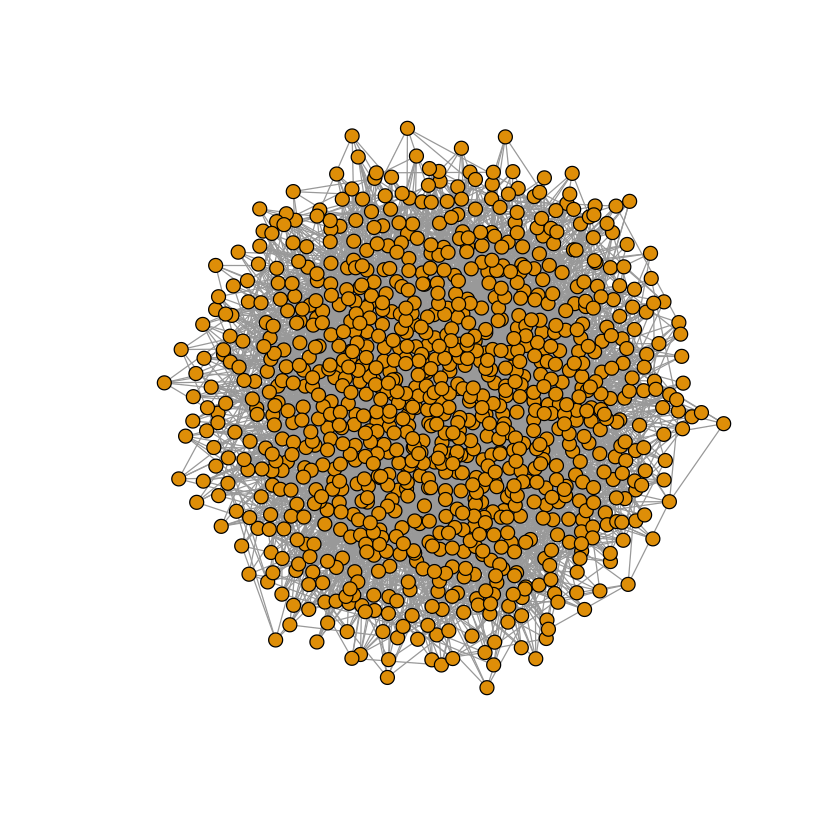

In [69]:
# Problem 2(a)
graph <- sample_pa(1000,m=5,directed=F)
plot(graph, vertex.size=5, vertex.label=NA)
is.connected(graph)

[1] 0.2834521

[1] 9

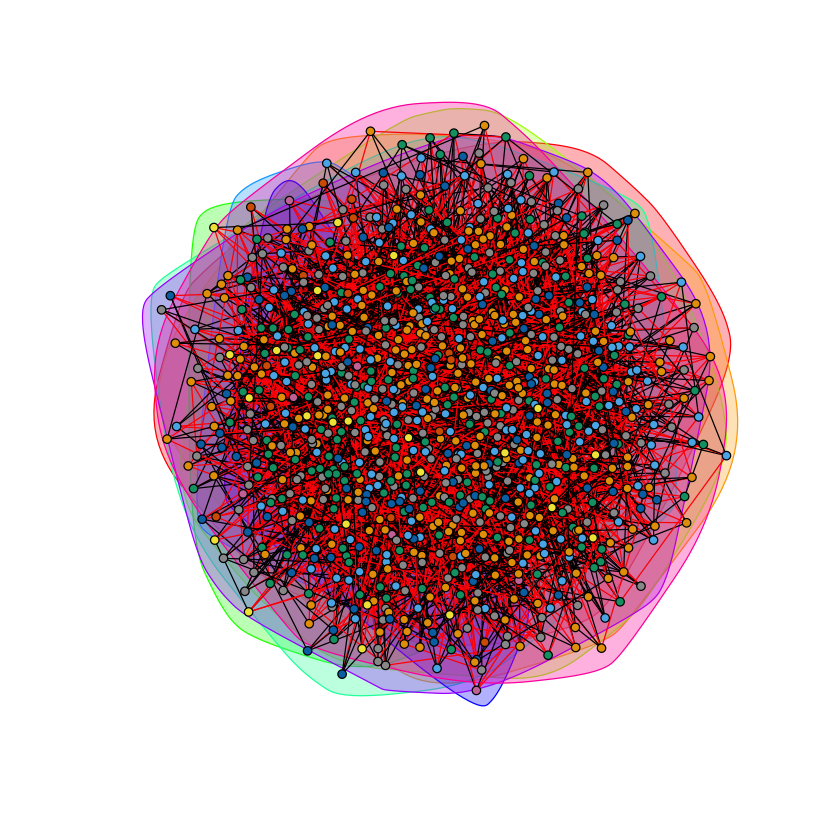

In [70]:
# Problem 2(b)
community <- cluster_fast_greedy(graph)
modularity(community)
length(community)
plot(community, graph,vertex.label=NA, vertex.size=3)

[1] 0.2736033

[1] 16

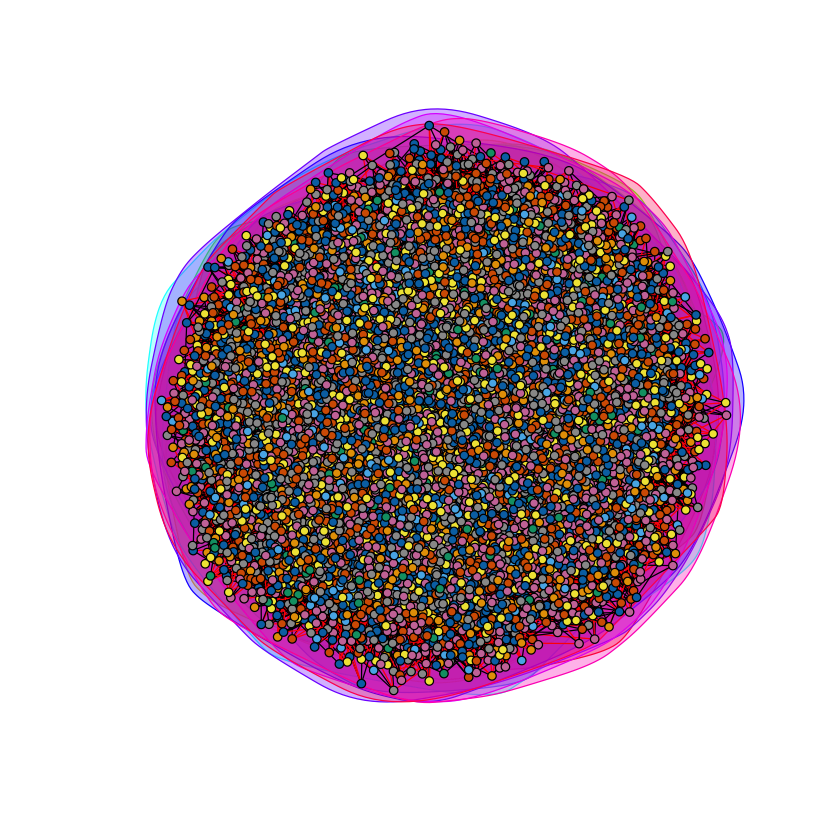

In [71]:
# Problem 2(c)
graph_larger <- sample_pa(10000,m=5,directed=F)
community_larger <- cluster_fast_greedy(graph_larger)
modularity(community_larger)
length(community_larger)
plot(community_larger, graph_larger,vertex.label=NA, vertex.size=3)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“46 y values <= 0 omitted from logarithmic plot”

[1] "Slope estimation using linear regression for n=1000"



Call:
lm(formula = log_degree ~ xlog)

Coefficients:
(Intercept)         xlog  
      1.388       -2.054  


[1] "Slope estimation using linear regression for n=10000"



Call:
lm(formula = log_degree_larger ~ xlog_larger)

Coefficients:
(Intercept)  xlog_larger  
      1.629       -2.264  


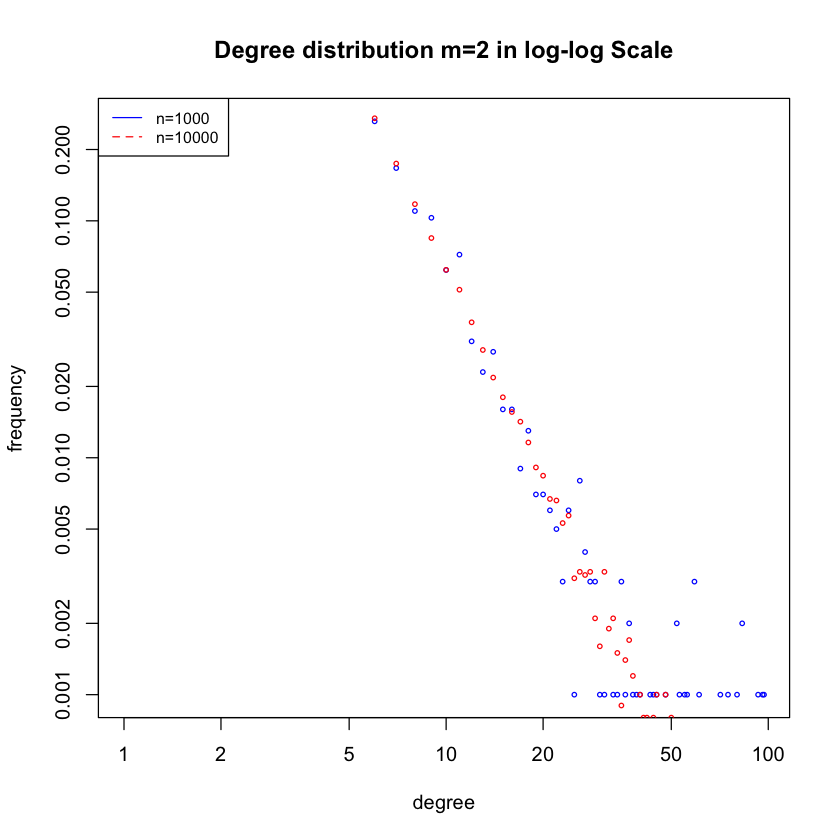

In [54]:
# Problem 2(d): 1000
# Linear regression uses the lm() function to create a regression model
degree <- degree.distribution(graph)
log_degree <- log(degree)
remove <- is.infinite(log_degree)
log_degree <- log(degree[!remove])
xlog <- 1:length(degree)
xlog <- log(xlog[!remove])
plot(degree,log='xy', cex=.5,col="blue",xlab = "degree",ylab = "frequency",main="Degree distribution m=2 in log-log Scale")
print("Slope estimation using linear regression for n=1000")
lm(log_degree~xlog)

# Problem 2(d): 10000
# Linear regression uses the lm() function to create a regression model
degree_larger <- degree.distribution(graph_larger)
log_degree_larger <- log(degree_larger)
remove_larger <- is.infinite(log_degree_larger)
log_degree_larger <- log(degree_larger[!remove_larger])
xlog_larger <- 1:length(degree_larger)
xlog_larger <- log(xlog_larger[!remove_larger])
points(degree_larger,cex=.5,col="red")
print("Slope estimation using linear regression for n=10000")
lm(log_degree_larger~xlog_larger)

legend("topleft", legend=c("n=1000", "n=10000"),
       col=c("blue","red"), lty=1:2, cex=0.8)


[1] "=================================== n = 1000 ====================================="
     degree      freq
1  1.000000 -2.689660
2  1.584963 -2.625934
3  2.000000 -3.279284
4  2.321928 -3.411195
5  2.584963 -3.698998
6  2.807355 -4.083141
7  3.000000 -4.265345
8  3.169925 -4.473931
9  3.321928 -5.442222
10 3.459432 -5.878321
11 3.584963 -6.965784
12 3.700440 -4.965784
13 3.807355 -7.643856
14 3.906891 -7.158429
15 4.000000 -5.795859
16 4.087463 -6.380822
17 4.169925 -5.643856
18 4.247928 -6.965784
19 4.321928 -6.265345
20 4.392317 -8.380822
21 4.523562 -6.795859
22 4.754888 -7.643856
23 4.807355 -6.795859
24 5.044394 -6.643856
25 5.087463 -6.643856
26 5.426265 -6.265345
27 5.459432 -6.058894
28 5.491853 -5.965784


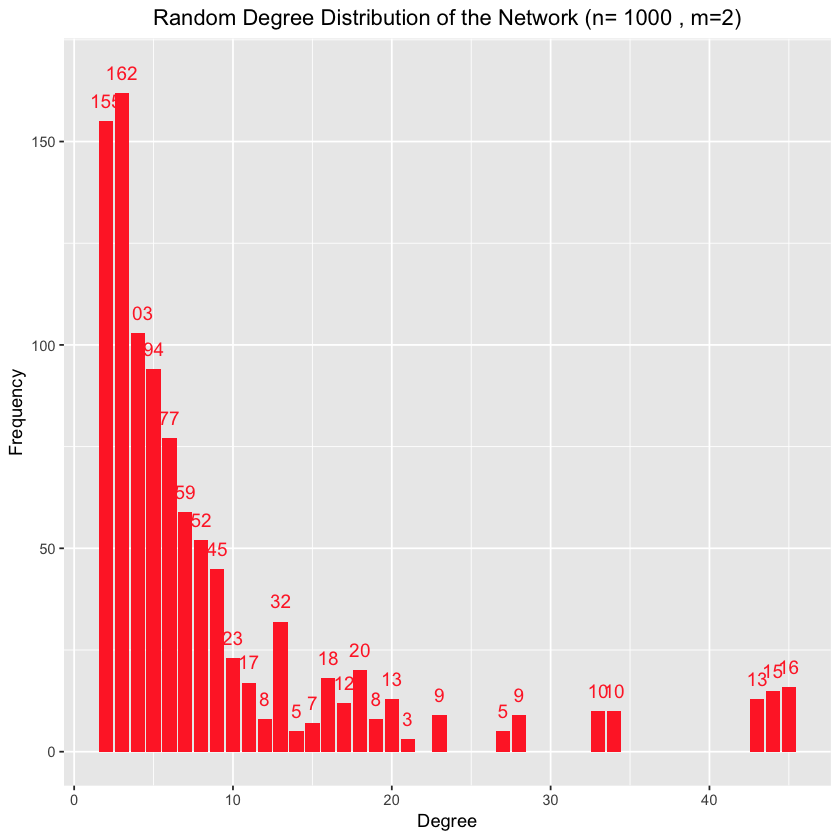


Call:
lm(formula = distr[["freq"]] ~ degree[["degree"]])

Coefficients:
       (Intercept)  degree[["degree"]]  
            -1.615              -1.071  


[1] "=================================================================================="
[1] "=================================== n = 10000 ===================================="


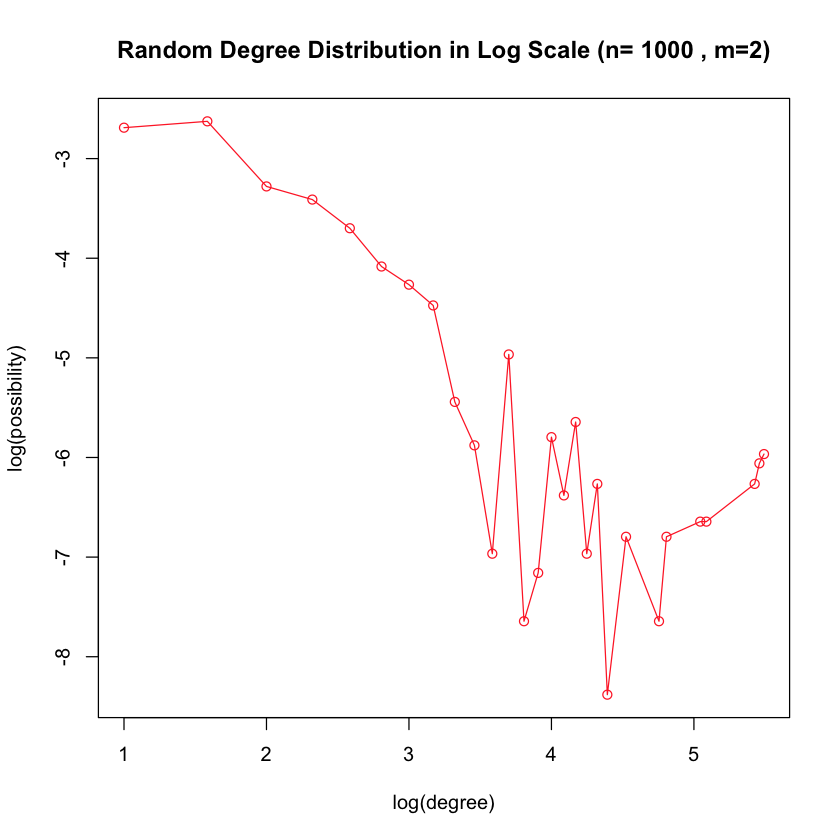

     degree       freq
1  1.000000  -2.715012
2  1.584963  -2.640254
3  2.000000  -3.094187
4  2.321928  -3.354022
5  2.584963  -3.738890
6  2.807355  -4.166179
7  3.000000  -4.461164
8  3.169925  -4.840629
9  3.321928  -5.299028
10 3.459432  -5.321928
11 3.584963  -5.615287
12 3.700440  -5.429731
13 3.807355  -6.137965
14 3.906891  -6.265345
15 4.000000  -6.811979
16 4.087463  -6.811979
17 4.169925  -6.828281
18 4.247928  -7.429731
19 4.321928  -6.506353
20 4.392317  -7.333516
21 4.459432  -7.097888
22 4.523562  -8.333516
23 4.584963  -9.287712
24 4.643856  -8.243318
25 4.700440  -7.506353
26 4.754888  -7.702750
27 4.807355  -7.179188
28 4.857981  -9.039785
29 4.906891  -7.764150
30 4.954196  -8.200250
31 5.000000  -9.587273
32 5.044394  -8.764150
33 5.169925  -8.429731
34 5.209453  -8.039785
35 5.285402  -8.480357
36 5.321928  -9.587273
37 5.357552  -9.702750
38 5.392317  -9.117787
39 5.426265 -10.287712
40 5.459432 -10.287712
41 5.584963  -8.895395
42 5.614710  -7.861448
43 5.643856

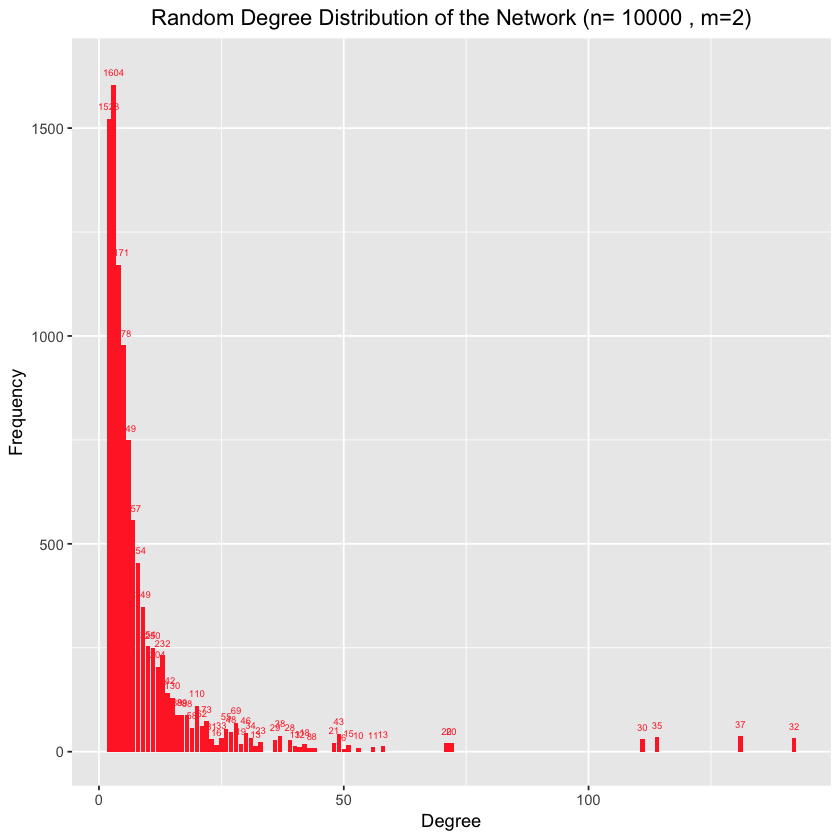


Call:
lm(formula = distr[["freq"]] ~ degree[["degree"]])

Coefficients:
       (Intercept)  degree[["degree"]]  
            -1.154              -1.358  


[1] "=================================================================================="


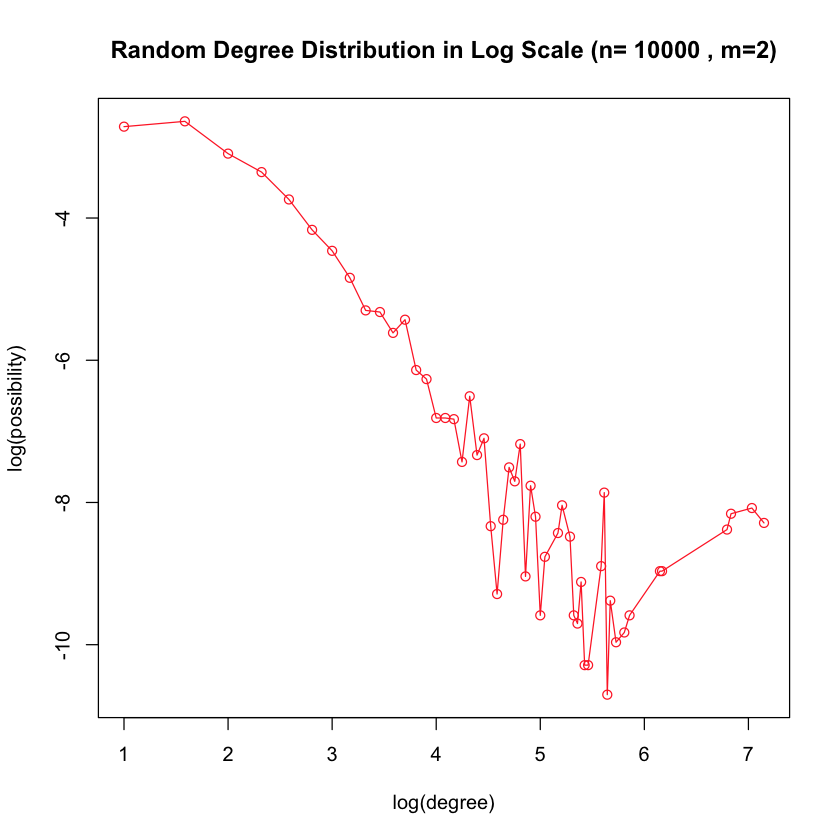

In [51]:
# Problem 2(e)
sample_count_degree = function(graph) {
    # sample vcount nodes, then sample their 1 neighbor for each, and get the degree
    degrees = array(0, vcount(graph))
    for (i in 1:vcount(graph)) {
        node <- sample(vcount(graph), 1)
        neighbors <- neighbors(graph, node, mode="total")
        if (length(neighbors) > 0) {
            neighbor = sample(length(neighbors), 1)
            degrees[i] <- degree(graph, neighbors[neighbor])
        }
    }
    
    # count the frequency of each degree
    freq <- sort(degrees)
    df <- data.frame(degree=c(NA), freq=c(NA))
    df <- df[-1, ]
    curDegree <- freq[1]
    count <- 1
    for (i in 2:length(freq)) {
        if (freq[i] != curDegree) {
            df[nrow(df)+1, ] <- c(curDegree, count)
            curDegree <- freq[i]
            count <- 1
        } else {
            count <- count + 1
        }
    }
    df[nrow(df)+1, ] <- c(curDegree, count)
    return (df)
}

random_degree_distribution_orig = function(df, n) {
    # plot original degree distribution histogram
    text_size <- 0
    dist <- 0
    if (n == 1000) {
        text_size <- 4
        dist <- 5
    } else {
        text_size <- 2
        dist <- 30
    }
    
    ggplot(df, aes(x=degree, y=freq))+ 
    geom_bar(stat = "identity", fill="firebrick1")+
    geom_text(aes(x=degree,y=freq+dist,label=freq),color="firebrick1",size=text_size,show.legend = T)+
    labs(title=paste("Random Degree Distribution of the Network (n=",n,", m=2)",collapse=""), x="Degree", y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5))
}

random_degree_distribution_log = function(df, n) {
    # calculate P for each degree
    degree <- log2(df["degree"])
    distr <- log2(df["freq"]/n)
    dataframe <- data.frame(degree, distr)
    print(dataframe)
    
    plot(dataframe, type="o", col="firebrick1", main=paste("Random Degree Distribution in Log Scale (n=",n,", m=2)",collapse=""),xlab="log(degree)",ylab="log(possibility)")
#     if (n == 1000) {
#         lines(seq(1,4.5,0.035), seq(-2,-8,-0.06),col="dodgerblue1",lty=2)
#     } else {
#         lines(seq(1,5.5,0.045), seq(-2.2,-9.4,-0.072),col="dodgerblue1",lty=2)
#     }
    
    lm(distr[["freq"]]~degree[["degree"]])
    
}

# plot n=1000
print("=================================== n = 1000 =====================================")
df <- sample_count_degree(graph)
random_degree_distribution_orig(df, 1000)
random_degree_distribution_log(df, 1000)
print("==================================================================================")

# plot n=10000
print("=================================== n = 10000 ====================================")
df <- sample_count_degree(graph_larger)
random_degree_distribution_orig(df, 10000)
random_degree_distribution_log(df, 10000)
print("==================================================================================")

[1] 1998

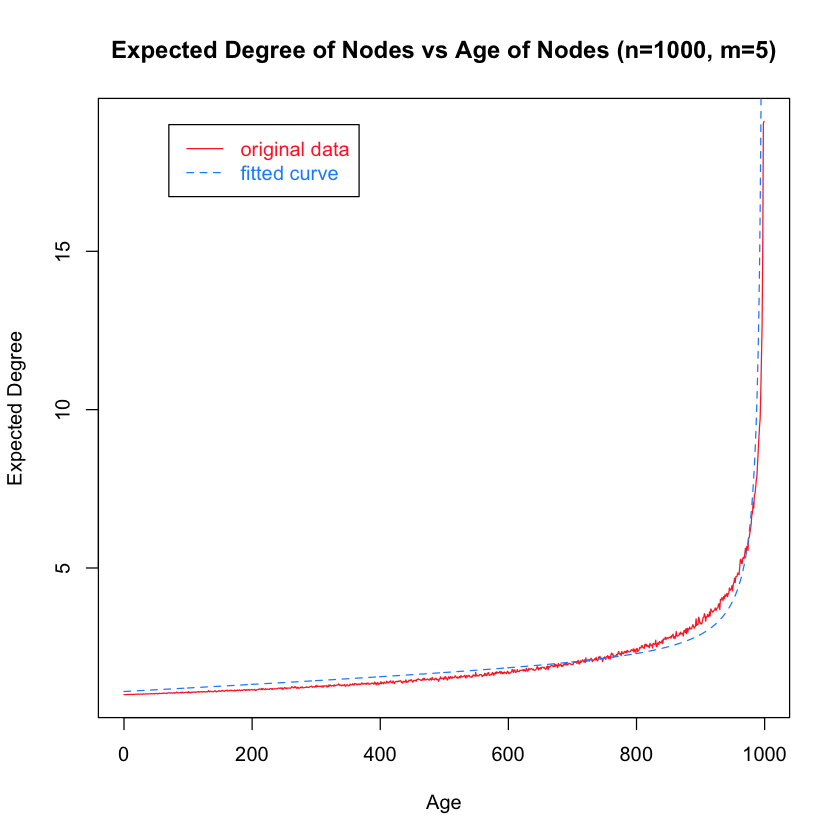

In [3]:
# Problem 2(f)
# iterate 1000 times, and calculate the mean degree for each age
degrees <- array(0, 1000)
for (i in 1:1000) {
    g <- barabasi.game(1000,m=1,directed=F)
    degrees <- degrees+degree(g)
}
degrees <- degrees/1000
age <- c(999:0)
age_degree_df <- data.frame(age, degrees)
sum(degrees)

# plot original expected degree vs age 
plot(age_degree_df, type="l", col="firebrick1", main="Expected Degree of Nodes vs Age of Nodes (n=1000, m=5)",xlab="Age",ylab="Expected Degree")
# fitting the curve
x <- c(0:999)
y <- 100/(1000-x) + 0.001*x + 1
lines(x, y, col="dodgerblue1", lty=2)
legend(70,19,c("original data","fitted curve"),col=c("firebrick1","dodgerblue1"),text.col=c("firebrick1","dodgerblue1"),lty=c(1,2))

[1] "Modularity of original network:  0.932152873594317"
[1] "Number of communities of original network:  35"
[1] "Modularity of degree sequence network (simple.no.multiple method):  0.83814344875406"
[1] "Number of communities of degree sequence network (simple.no.multiple method):  145"


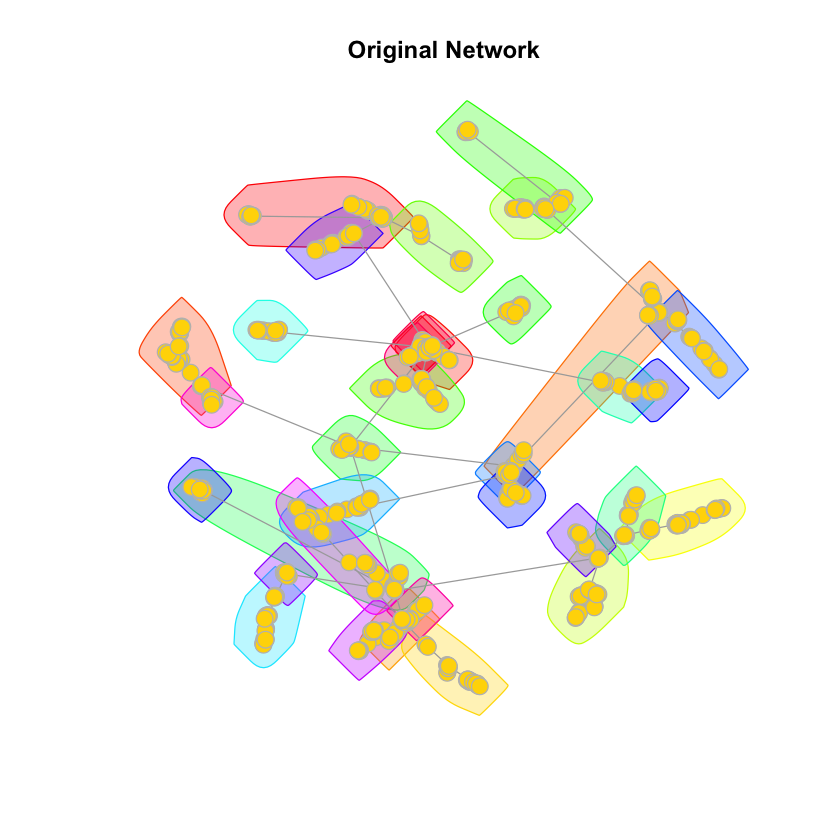

[1] "simple.no.multiple method:  FALSE"


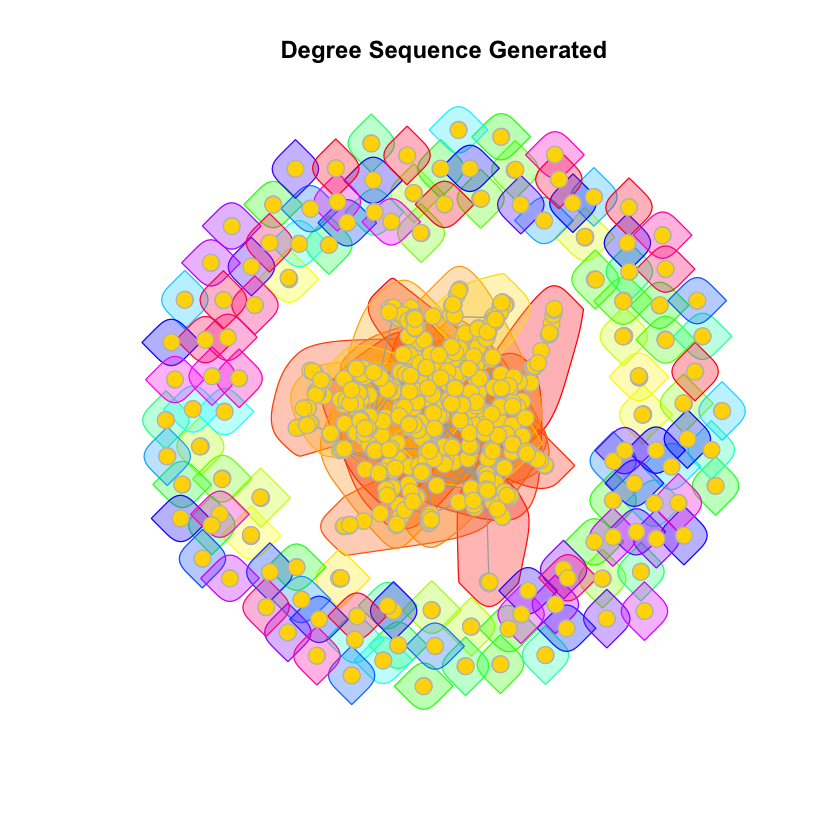

In [57]:
# Problem 2(h)
# generate a new network with n=1000, m=1
g <- sample_pa(1000, m=1, directed=F)
communities1 <- cluster_fast_greedy(g)
print(paste("Modularity of original network: ",modularity(communities1),collapse=""))
print(paste("Number of communities of original network: ",length(communities1),collapse=""))
plot(g, mark.groups=groups(communities1), edge.arrow.size=.5, 
     vertex.color="gold", vertex.size=6, vertex.frame.color="gray", vertex.label="", 
    main="Original Network") 

# 2) use "simple.no.multiple"
degseq_graph2 <- sample_degseq(degree(g), method="simple.no.multiple")
communities3 <- cluster_fast_greedy(degseq_graph2)
print(paste("Modularity of degree sequence network (simple.no.multiple method): ",modularity(communities3),collapse=""))
print(paste("Number of communities of degree sequence network (simple.no.multiple method): ",length(communities3),collapse=""))
plot(degseq_graph2, mark.groups=groups(communities3), edge.arrow.size=.5, 
     vertex.color="gold", vertex.size=6, vertex.frame.color="gray", vertex.label="", 
    main="Degree Sequence Generated") 
print(paste("simple.no.multiple method: ",is.connected(degseq_graph2)))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”

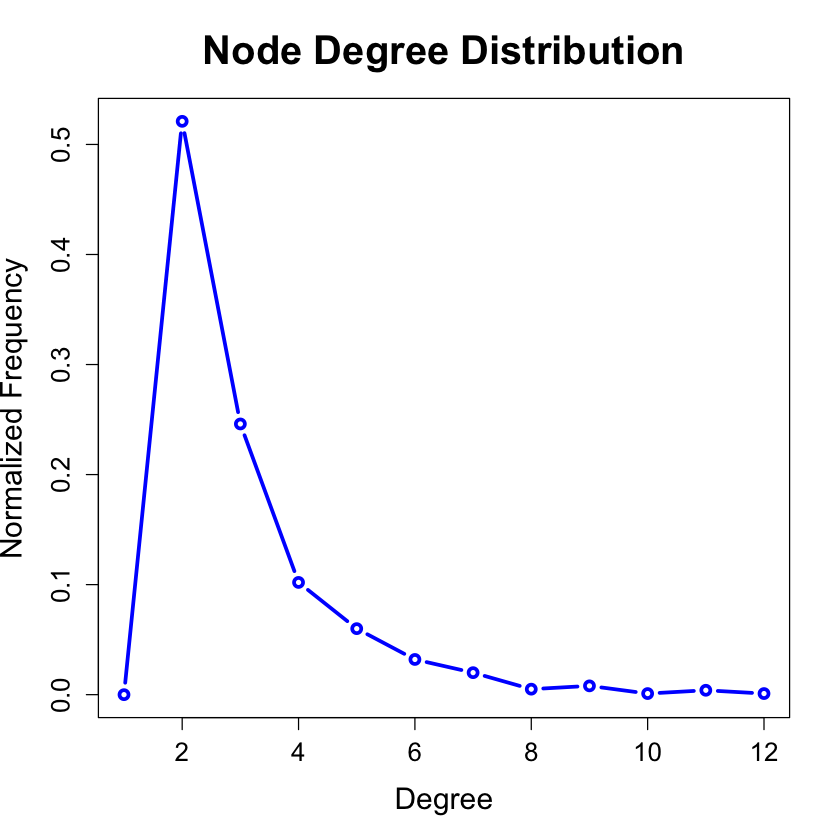


Call:
lm(formula = log_degree ~ xlog)

Coefficients:
(Intercept)         xlog  
      2.423       -3.533  


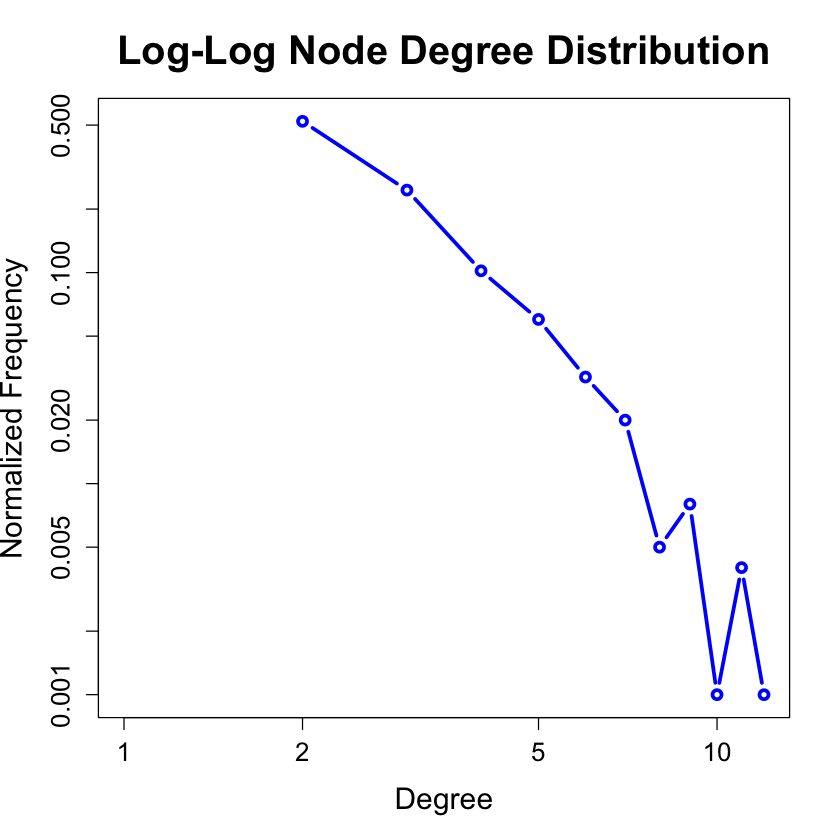

In [4]:
# Problem 3(a)
# m = 1,α=1,β=−1,a=c=d=1,b=0 (defaults in R funtion)
graph = sample_pa_age(1000,m=1,pa.exp = 1,aging.exp=-1,directed=F)
hist = degree_distribution(graph)
plot(hist, type="b", main="Node Degree Distribution", lwd = 3,
    xlab="Degree", ylab="Normalized Frequency",col="blue",cex.main = 2, cex.lab =1.5, cex.axis = 1.3)

# Estimate power law exponent
log_degree = log(hist)
remove = is.infinite(log_degree)
log_degree = log(hist[!remove])
xlog = 1:length(hist)
xlog <- log(xlog[!remove])
plot(hist,log='xy',type="b", main="Log-Log Node Degree Distribution", lwd = 3,
    xlab="Degree", ylab="Normalized Frequency",col="blue",cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
lm(log_degree~xlog)

[1] 0.9351053

[1] 33

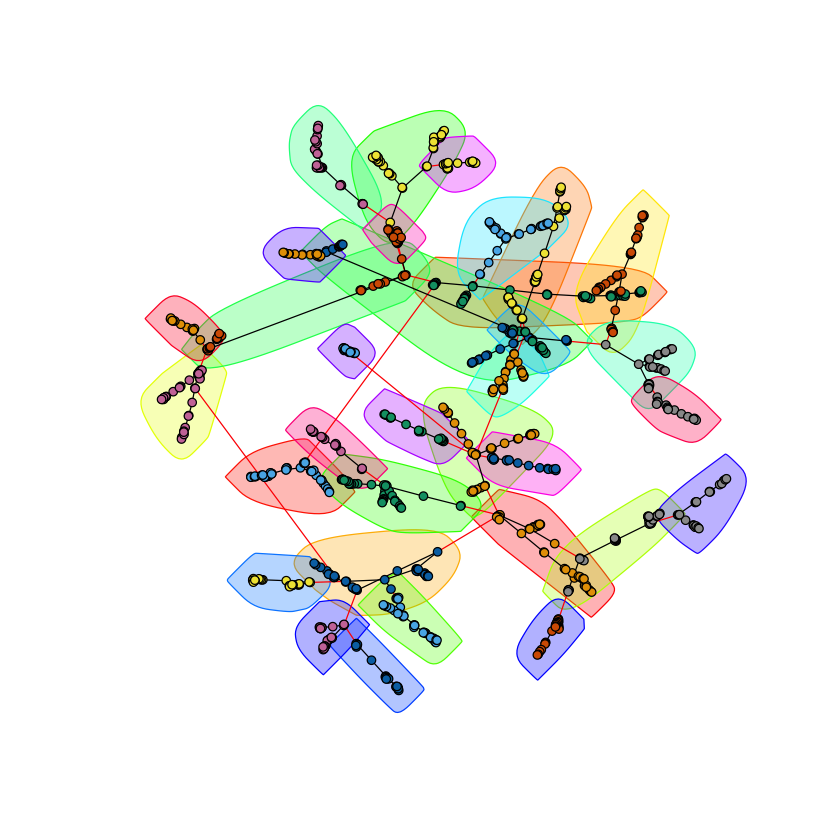

In [5]:
# Problem 3(b)
community = cluster_fast_greedy(graph)
modularity(community)
length(community)
plot(community, graph,vertex.label=NA, vertex.size=3)

# Part 2: Random Walk on Networks

## Problem 1: Random Walks on ER Networks

In [4]:
# Given code on CCLE
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

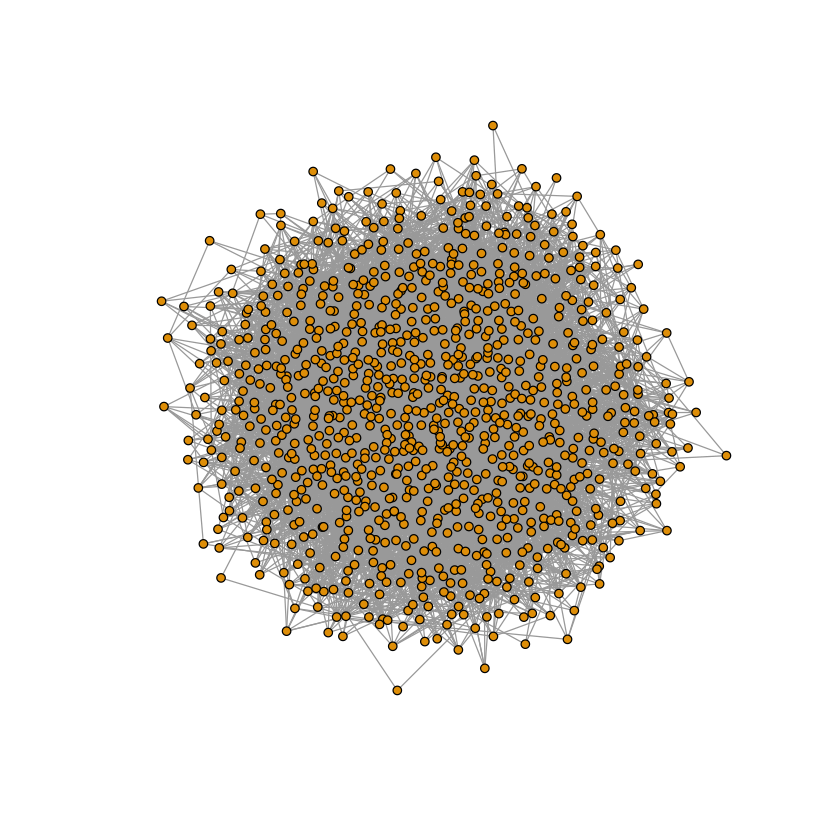

In [5]:
# Problem 1(a)

graph <- erdos.renyi.game(1000, 0.01, directed=FALSE)
plot(graph, vertex.size=3, vertex.label=NA, edge.arrow.size=1)
transition_matrix = create_transition_matrix(graph)

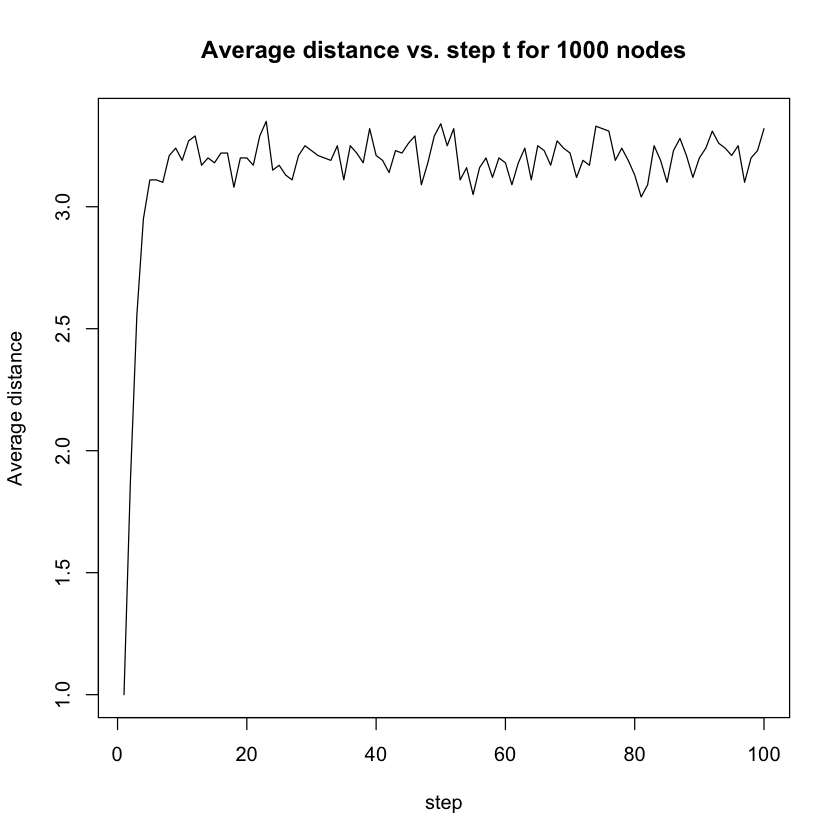

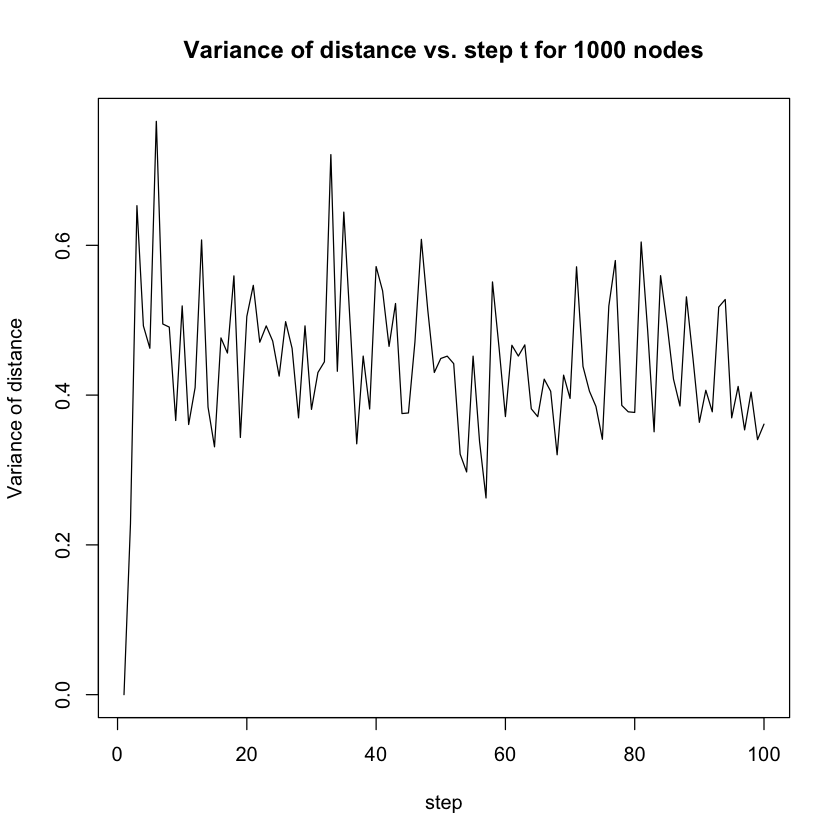

In [6]:
# Problem 1(b)

ts = 100 # Number of steps. Diameter too large
iteration_times = 100

# Store mean and var
avg_distances = c()
var_distances = c()
transition_matrix = create_transition_matrix(graph)

# Random walk
for (t in (1:ts)){
    temp_distances = c()
    for (i in 1:iteration_times){
        start_node = sample(vcount(graph), 1)
        last_node = random_walk(graph, t, start_node, transition_matrix)
        cur_distance = distances(graph, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(avg_distances, type='l', xlab = "step", ylab = "Average distance", main="Average distance vs. step t for 1000 nodes")
plot(var_distances, type='l', xlab = "step", ylab = "Variance of distance", main="Variance of distance vs. step t for 1000 nodes")


Warning message in plot.window(xlim, ylim, "", ...):
“graphical parameter "type" is obsolete”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“graphical parameter "type" is obsolete”Warning message in axis(1, ...):
“graphical parameter "type" is obsolete”Warning message in axis(2, ...):
“graphical parameter "type" is obsolete”

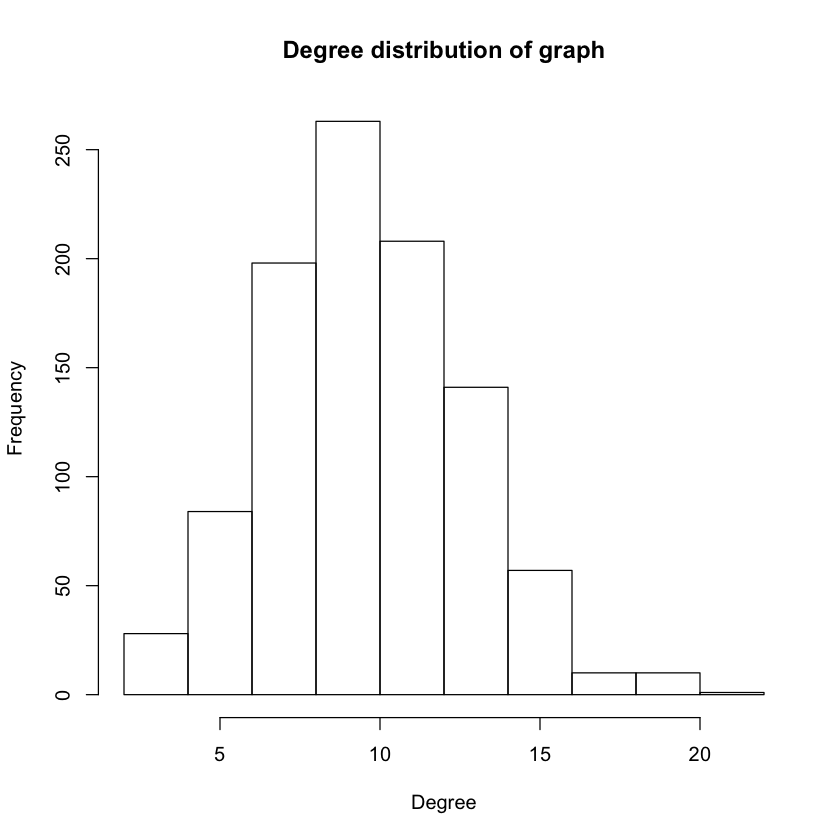

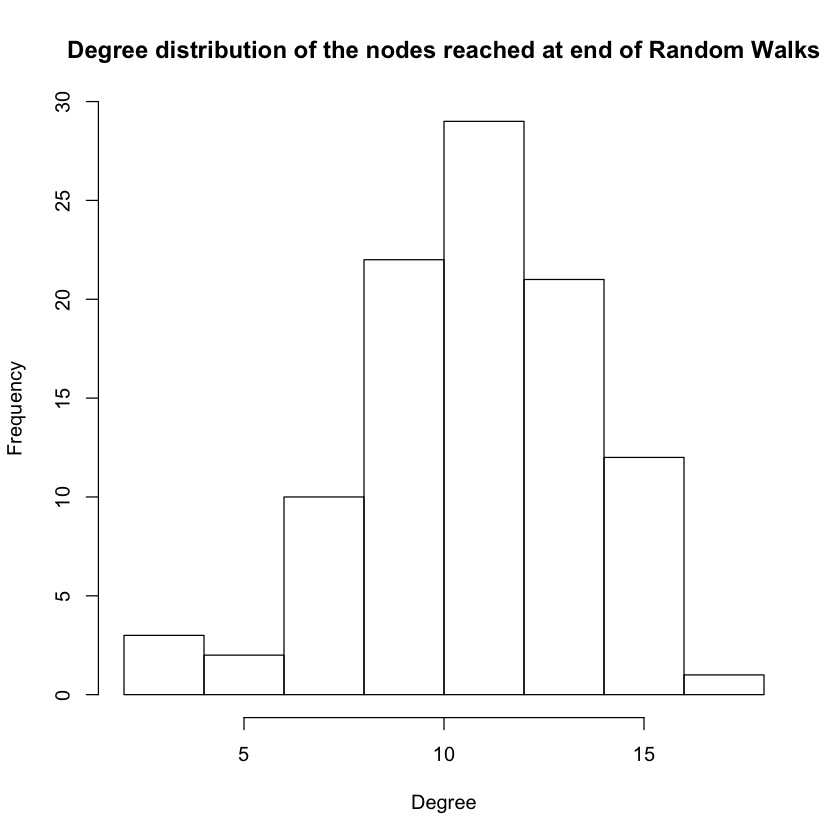

In [7]:
# Problem 1(c)

# Measure the degree distribution of the nodes reached at the end of the random walk.
# How does it compare to the degree distribution of graph?

step_number = 100
random_number = 100
end_nodes = rep(NA, random_number)
for (start_node in (1: random_number)) {
    node = random_walk(graph, step_number, start_node, transition_matrix)        
    end_nodes[start_node] <- node
}

hist(degree(graph),main="Degree distribution of graph",xlab="Degree",ylab="Frequency")
hist(degree(graph, end_nodes),main="Degree distribution of the nodes reached at end of Random Walks",type = 'o', xlab="Degree",ylab="Frequency")


In [8]:
# Problem 1(d)
# Repeat 1(b) for undirected random networks with 10000 nodes.

graph <- erdos.renyi.game(10000, 0.01, directed=FALSE)

transition_matrix = create_transition_matrix(graph)

ts = 100 # Number of steps. Diameter too large
iteration_times = 100

# Store mean and var
avg_distances = c()
var_distances = c()
transition_matrix = create_transition_matrix(graph)

# Random walk
for (t in (1:ts)){
    temp_distances = c()
    for (i in 1:iteration_times){
        start_node = sample(vcount(graph), 1)
        last_node = random_walk(graph, t, start_node, transition_matrix)
        cur_distance = distances(graph, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(avg_distances, type='l', xlab = "step", ylab = "Average distance", main="Average distance vs. step t for 10000 nodes")
plot(var_distances, type='l', xlab = "step", ylab = "Variance of distance", main="Variance of distance vs. step t for 10000 nodes")


## Problem 2: Random Walks on fat-tailed networks


Diameter of the graph:  18

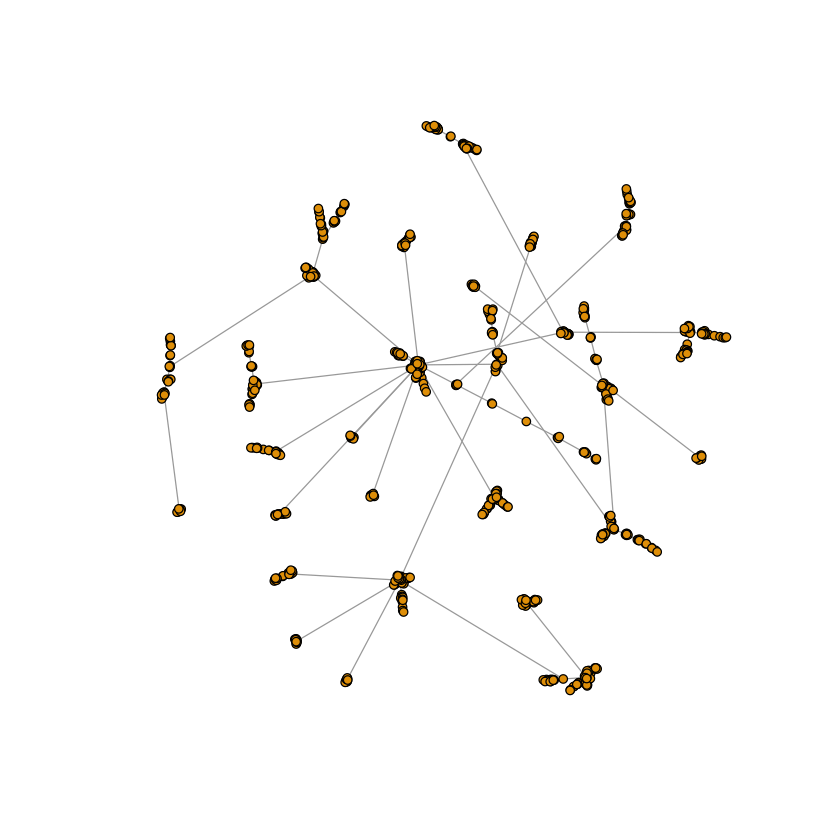

In [9]:
# Problem 2(a)
# Generate networks using preferential attachment model
n = 1000
m = 1
g1 <- barabasi.game(n=n, m=m, directed=FALSE)
plot(g1, vertex.size=3, vertex.label=NA, edge.arrow.size=1)


# Find diameter
cur_diameter = diameter(g1, directed = FALSE)
cat(paste("\nDiameter of the graph: ", cur_diameter))

In [10]:
# Problem 2(b)
ts = seq(1:200) # Number of steps. Diameter too large
iteration_times = 1000

# Store mean and var
avg_distances = c()
var_distances = c()
transition_matrix = create_transition_matrix(g1)

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g1), 1)
        last_node = random_walk(g1, t, start_node, transition_matrix)
        cur_distance = distances(g1, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(ts, avg_distances, type="o", main="Mean distances of random walk", xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main="Variances of the random walk distances", xlab="Steps",ylab="Variances")

In [11]:
# Problem 2(c)
# Store degrees
random_walk_degrees = c()
iteration_times = 1000
t = 200 # Number of steps (Reach steady state)
transition_matrix = create_transition_matrix(g1)

for (i in 1:iteration_times)
{
    start_node = sample(vcount(g1), 1)
    last_node = random_walk(g1, t, start_node, transition_matrix)
    cur_degree = degree(g1, last_node)
    random_walk_degrees = c(random_walk_degrees, cur_degree)
}



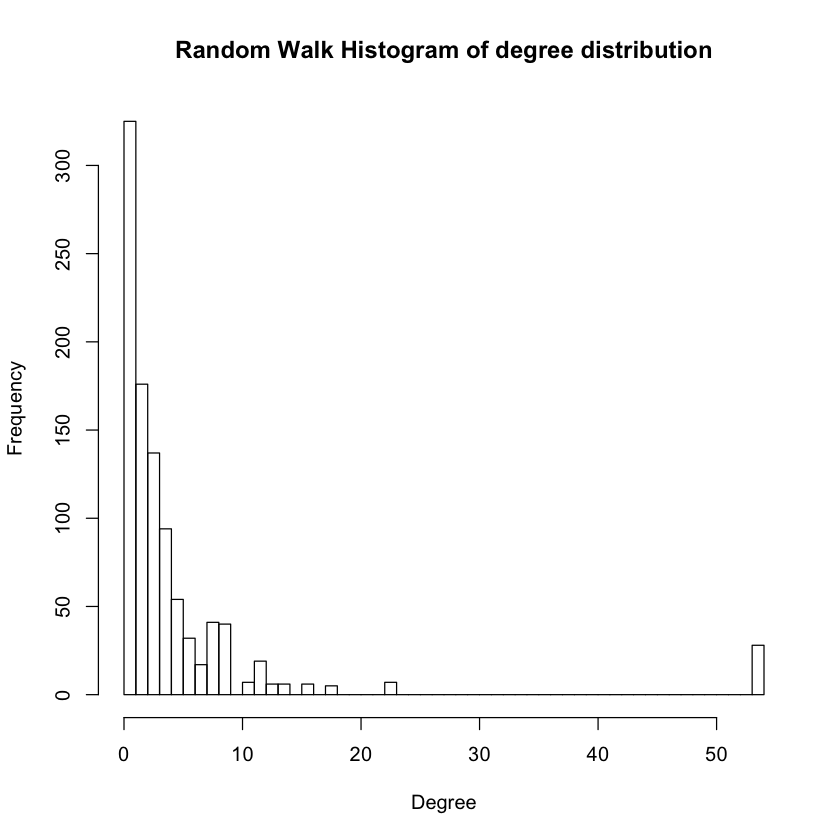

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“37 y values <= 0 omitted from logarithmic plot”

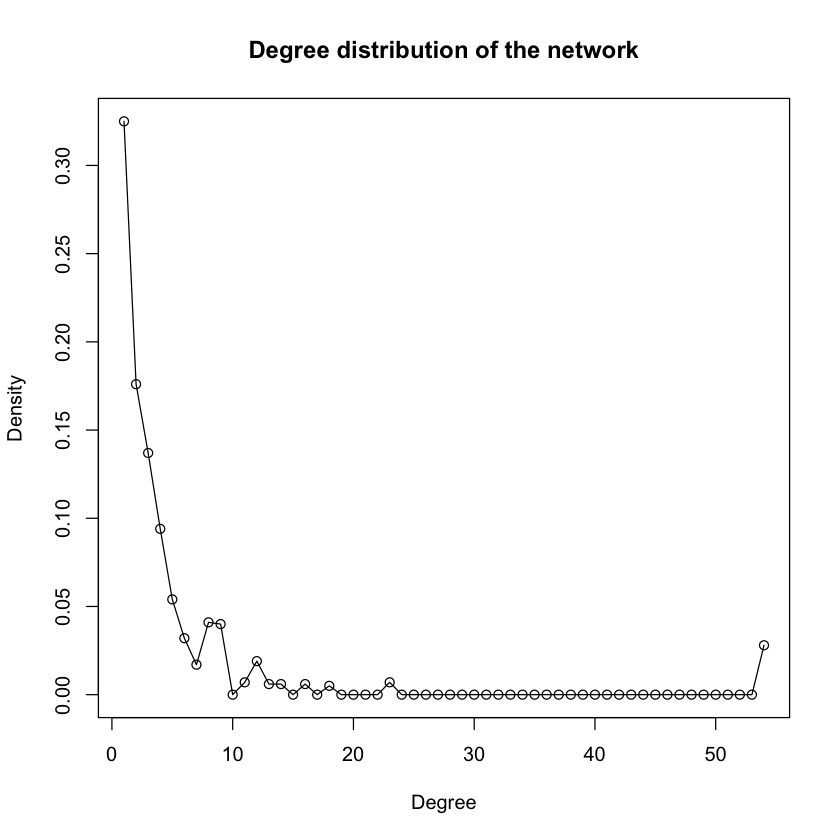

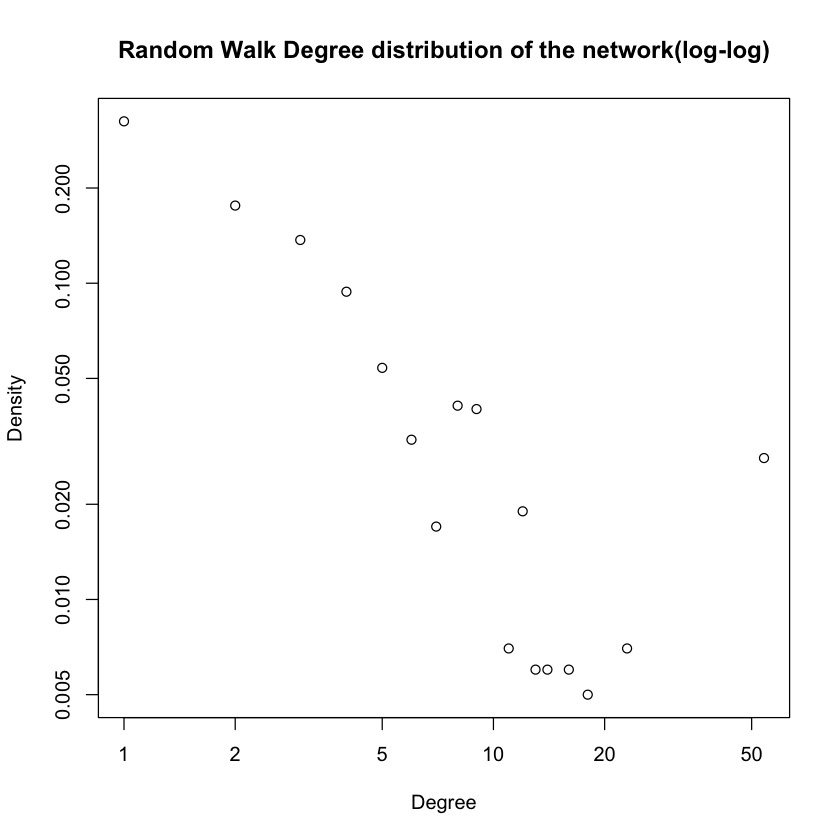

In [27]:
h = hist(random_walk_degrees, breaks=seq(0, max(random_walk_degrees)), main ="Random Walk Histogram of degree distribution", xlab="Degree")
plot_x = tail(h$breaks, length(h$breaks) - 1) # Remove 0 degree
plot_y = h$density
plot(plot_x, plot_y, main="Degree distribution of the network", xlab="Degree", ylab="Density", type="o")
plot(plot_x, plot_y, log="xy", main="Random Walk Degree distribution of the network(log-log)", xlab="Degree", ylab="Density")

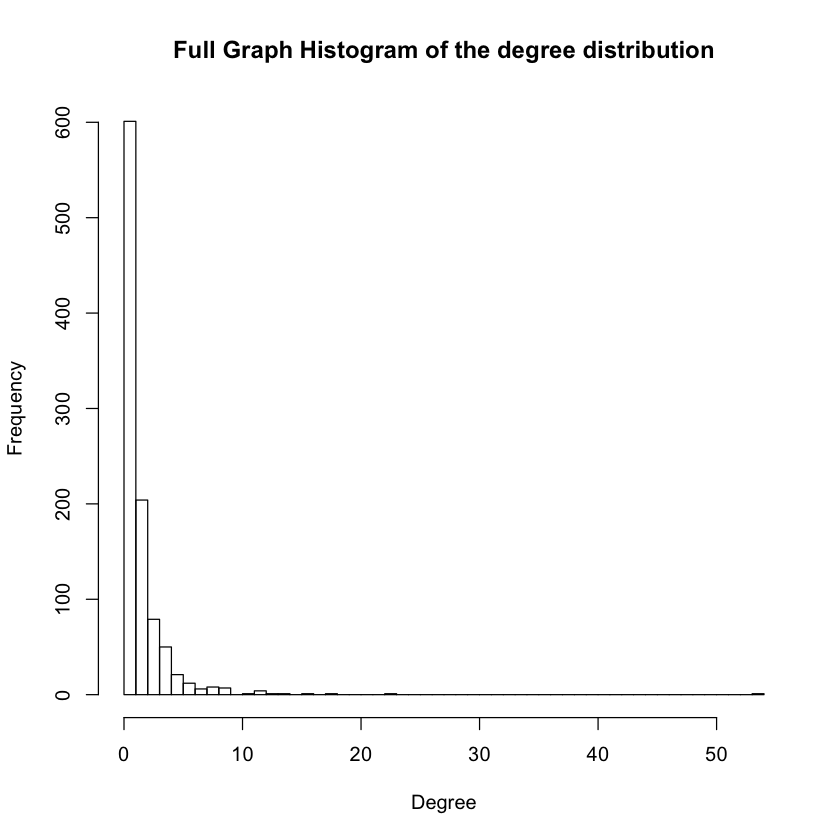

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“37 y values <= 0 omitted from logarithmic plot”

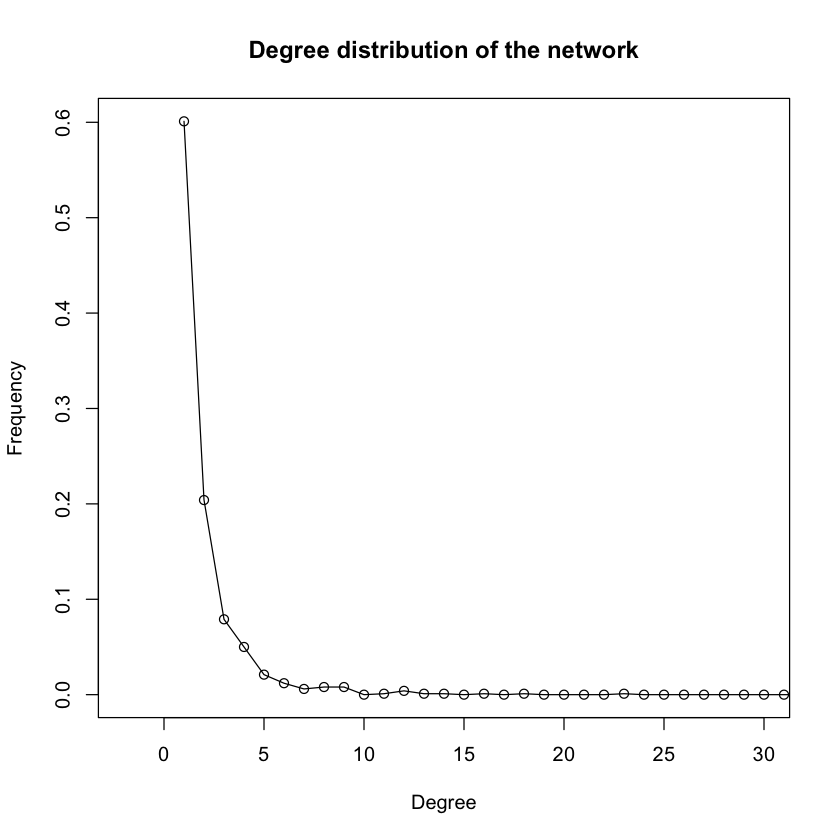

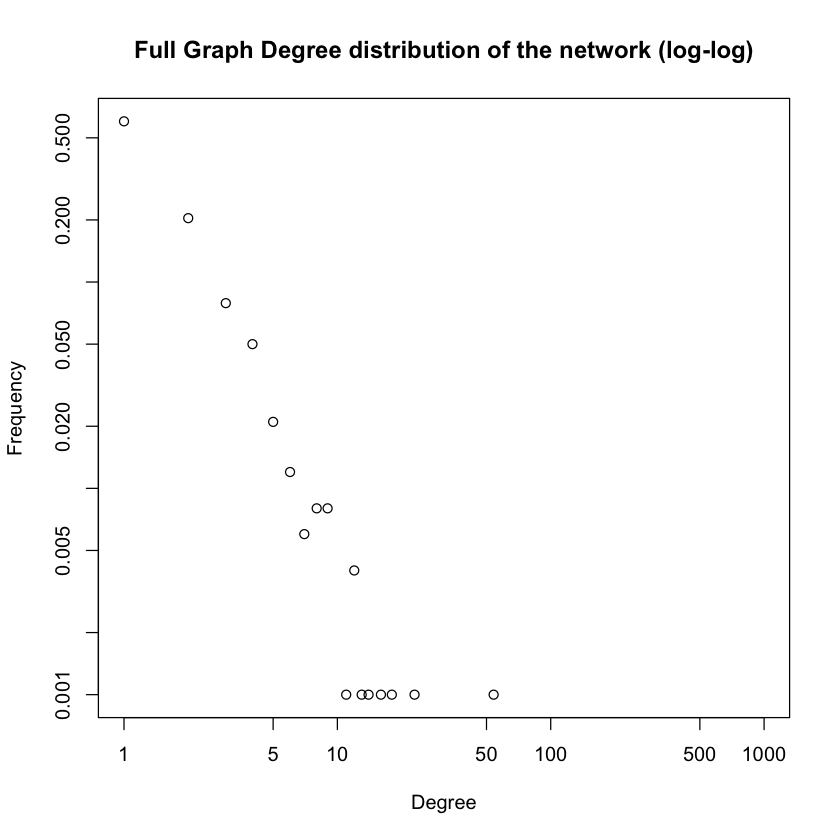

In [28]:
# Problem 2(c): Plotting
# Degree distribution of the graph
hist(degree(g1)[2:length(degree(g1))], breaks=seq(0, max(degree(g1))), main="Full Graph Histogram of the degree distribution",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g1)[2:length(degree(g1))],xlim=c(-2,30), main="Degree distribution of the network",xlab="Degree",ylab="Frequency", type="o")
plot(degree.distribution(g1)[2:length(degree(g1))], log="xy", main="Full Graph Degree distribution of the network (log-log)",xlab="Degree",ylab="Frequency")

In [29]:
# Problem 2(d): n=100
n = 100
cat("\nResults with n = ", n)
m = 1
g2 =  barabasi.game(n=n, m=m, directed=FALSE)
ts = seq(1:200) # Number of steps.
iteration_times = 1000
transition_matrix = create_transition_matrix(g2)

cur_connected = is.connected(g2)
cat(paste('\nIs the graph connected: ', cur_connected))

# Find diameter
cur_diameter = diameter(g2, directed=FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

#cur_diameter = diameter(g1, directed = FALSE)
#cat(paste("\nDiameter of the graph: ", cur_diameter))

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g2), 1)
        last_node = random_walk(g2, t, start_node, transition_matrix)
        cur_distance = distances(g2, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}


Results with n =  100
Is the graph connected:  TRUE
Diameter of GCC:  13

In [ ]:
# Problem 2(d): n=10000
n = 10000
cat("\nResults with n = ", n)
m = 1
g3 =  barabasi.game(n=n, m=m, directed=FALSE)
ts = seq(1:80) # Number of steps.
iteration_times = 1000
transition_matrix = create_transition_matrix(g3)

cur_connected = is.connected(g3)
cat(paste('\nIs the graph connected: ', cur_connected))

# Find diameter
cur_diameter = diameter(g3, directed=FALSE)
cat(paste("\nDiameter of GCC: ", cur_diameter))

# Store mean and var
avg_distances = c()
var_distances = c()

# Random walk
for (t in ts)
{
    temp_distances = c()
    for (i in 1:iteration_times)
    {
        start_node = sample(vcount(g3), 1)
        last_node = random_walk(g3, t, start_node, transition_matrix)
        cur_distance = distances(g3, start_node, last_node)
        temp_distances = c(temp_distances, cur_distance)
    }
    avg_distances = c(avg_distances, mean(temp_distances))
    var_distances = c(var_distances, var(temp_distances))
}

plot(ts, avg_distances, type="o", main=paste("Mean distances of random walk with n = ", n), xlab="Steps",ylab="Mean distances")
plot(ts, var_distances, type="o", main=paste("Variances of the random walk distances with n = ", n), xlab="Steps",ylab="Variances")

## Problem 3: PageRank

In [33]:
# Functions
create_transition_matrix = function (g)
{
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk_path = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    vs = c()
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        vs = c(vs, v)        
    }
    
    return(vs)
}


Results with n =  1000

[1] 0.9190097

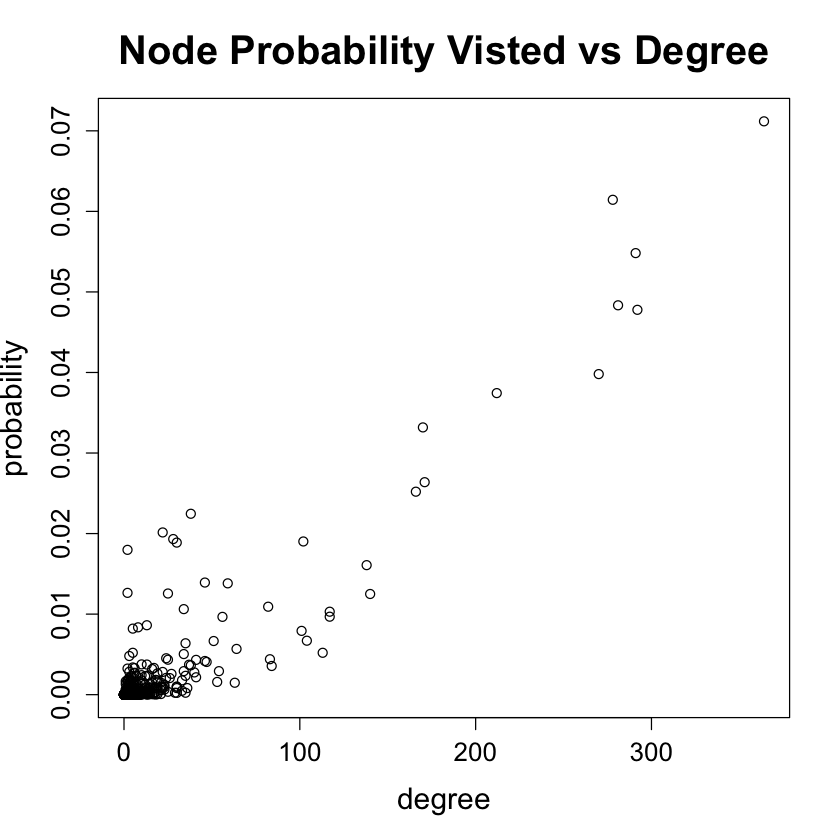

In [36]:
# Problem 3(a): n=10000
n = 1000
cat("\nResults with n = ", n)
m = 4
g1 =  barabasi.game(n=n, m=m, directed = TRUE)
g2 =  barabasi.game(n=n, m=m, directed = TRUE)
g2 = permute(g2, sample(vcount(g2))) # permute the g2 graph
edgelist = as_edgelist(g2)

#plot(g1)
l = length(edgelist)/2
edge_tuple = c()

for (i in 1:l)
{
    tuple_to_add = c(edgelist[i], edgelist[i+l])
    edge_tuple = c(edge_tuple, tuple_to_add)
}

g1_add = add_edges(g1, edge_tuple)
step = 1000
time = 50
count <- rep(0, n)
for (i in 1:time)
{
    start_node = sample(1:vcount(g1_add), 1)
    walk_path = random_walk_path(g1_add, step, start_node)
#cat(end_node)


    for (i in walk_path)
    {
        count[i] = count[i]+1
    }
}
prob = count/step/time
plot(degree(g1_add, mode='in'), prob, xlab='degree', ylab='probability', main="Node Probability Visted vs Degree", 
    cex.main = 2, cex.lab =1.5, cex.axis = 1.3)
cor(prob, degree(g1_add, mode='in'))